# Project 7: Citi Bike System Data
## by GimPei Ng

## 1 Introduction

> New York city launched [Citi Bike](https://www.citibikenyc.com/how-it-works), the largest bike share program in the United States, in May 2013. It is now with 14,500 bikes and 950 station across Manhattan, Brooklyn, Queens and Jersey City. It was designed for **quick trips** with convenience in mind, and it's a fun and afforadable way to get around the town.   
>
> The data available for download via the [system data](https://www.citibikenyc.com/system-data) includes information about individual rides made in the bike-sharing system like trip duration, start and end station, user type, gender and etc.
>
> I will start by my data wrangling process.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# for zipfile, combining files
import zipfile
import os
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

## 2 Data Wrangling
This section includes the following steps:
- Gathering data
- Assessing data
- Cleaning data

### 2.1 Gather
> I downloaded bike share data of New York city from [the bike share data portals here](https://www.citibikenyc.com/system-data). Each zip file is the data for a month. I downloaded data from year 2019 until Oct-2020, approximately 2 years dataset.

Extract all contents from all the zip file downloaded

In [2]:
folder_loc = './data/'

In [3]:
for zip_item in os.listdir(folder_loc):
    # extract all zip file in the folder
    try:
        with zipfile.ZipFile(folder_loc + zip_item, 'r') as myzip:
            myzip.extractall(folder_loc + 'csv_file/') #extract file to another folder
    except Exception:
        pass

Combine all csv files into one   
[Ref](https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/)

In [4]:
# use `glob()` to return a list of all files with `.csv` extention, save in `all_files`
folder_dir = folder_loc + 'csv_file/'
all_files = glob.glob(folder_dir + '*.csv')
print(f'Total csv files: {len(all_files)}')

Total csv files: 22


In [5]:
# Use pandas to concatenate all files in the `all_files` list and export as csv

# combine all files
df = pd.concat([pd.read_csv(f) for f in all_files])

### 2.2 Assess
> After obtaining and combining all the data, this section is to assess them to detect any quality or tidiness issues.

In [6]:
# Load the file
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,156,2020-10-01 00:02:40.2600,2020-10-01 00:05:17.0140,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,42293,Subscriber,1996,1
1,143,2020-10-01 00:02:53.5020,2020-10-01 00:05:16.9650,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,44740,Subscriber,1998,1
2,305,2020-10-01 00:04:31.3160,2020-10-01 00:09:36.3840,3273,Manila & 1st,40.721651,-74.042884,3269,Brunswick & 6th,40.726012,-74.050389,41369,Subscriber,1988,2
3,1097,2020-10-01 00:05:18.3680,2020-10-01 00:23:36.1240,3199,Newport Pkwy,40.728745,-74.032108,3281,Leonard Gordon Park,40.745910,-74.057271,42285,Customer,2001,1
4,277,2020-10-01 00:09:17.5990,2020-10-01 00:13:55.5150,3199,Newport Pkwy,40.728745,-74.032108,3638,Washington St,40.724294,-74.035483,45231,Subscriber,1965,1


In [7]:
# No null value
print(f'shape of dataset: {df.shape}\n')
df.info()

shape of dataset: (708780, 15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708780 entries, 0 to 53832
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             708780 non-null  int64  
 1   starttime                708780 non-null  object 
 2   stoptime                 708780 non-null  object 
 3   start station id         708780 non-null  int64  
 4   start station name       708780 non-null  object 
 5   start station latitude   708780 non-null  float64
 6   start station longitude  708780 non-null  float64
 7   end station id           708780 non-null  int64  
 8   end station name         708780 non-null  object 
 9   end station latitude     708780 non-null  float64
 10  end station longitude    708780 non-null  float64
 11  bikeid                   708780 non-null  int64  
 12  usertype                 708780 non-null  object 
 13  birth year               708

In [8]:
# There is some ambuiguity of the `birth year`, where there is user birth year at 1887, 
# that is the user is at age of 132 if the record is from year 2019.
df.describe(include=[np.number])

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,7.087800e+05,708780.000000,708780.000000,708780.000000,708780.000000,708780.000000,708780.000000,708780.000000,708780.00000,708780.000000
mean,1.098102e+03,3298.459910,40.722506,-74.046513,3296.877463,40.722065,-74.045838,33656.126636,1981.36854,1.133673
std,1.370788e+04,177.259673,0.007192,0.011339,185.292356,0.068773,0.124895,7277.479861,10.59398,0.570747
min,6.100000e+01,3183.000000,40.709651,-74.083639,82.000000,0.000000,-74.083639,14531.000000,1887.00000,0.000000
25%,2.580000e+02,3195.000000,40.717733,-74.050656,3193.000000,40.717733,-74.050389,29223.000000,1973.00000,1.000000
50%,4.240000e+02,3209.000000,40.721525,-74.043845,3209.000000,40.721124,-74.043117,29571.000000,1984.00000,1.000000
75%,8.570000e+02,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,42296.000000,1989.00000,1.000000
max,3.261756e+06,3792.000000,40.748716,-74.032108,4069.000000,40.848282,0.000000,48114.000000,2004.00000,2.000000


In [9]:
df.describe(include=['O'])

,starttime,stoptime,start station name,end station name,usertype
count,708780,708780,708780,708780,708780
unique,695325,695322,53,172,2
top,2020-10-09 16:23:27.7400,2020-10-02 20:23:15.9550,Grove St PATH,Grove St PATH,Subscriber
freq,2,2,67234,82249,568541


### What is the structure of your dataset?
> There are 708,780 rows of data with 15 features (columns). Most features are self-explain and I list out a few of them that required further explanation about them. All data are complete with no null value. Most features are categorical in nature with only tripduration is numeric in nature.    
> #### Data dictionary   
|**No**| **Colume's name** |**Descriptions**|
|:----:|:------------------|:---------------|
|01|tripduration|Trip Duration (seconds)|
|02|usertype|User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)|
|03|gender|Gender (zero = unknown; 1 = male; 2 = female)|

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out the riders' trend in NYC by answering the following questions: 
- What is the monthly ridership?
- What is the daily bike usage on average by month?
- How long does the average trip duration take?
- How's the rider performance by trip duration, user type, gender, and age?
- What is the busiest stations for start and end station name?
- what is the most popular route based on start station and end station?
- Any trends over time observed for the features mentioned above?
- When are most trips taken in terms of time of day, day of week, and month of the year?
- Does the above trends varies if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will study the trip duration, start time, start station name, end station name, bikeid, usertype, birth year and gender, and investigate their trend by year, by month, and by hours. 

### Any data quality or tidiness issue observed?
#### Quality
1. starttime and stoptime, need to change to datetime format.
2. start station id, end station id, bikeid, gender should be in str format instead of int64 numeric format, as they don't carry any numeric meaning.
3. There are small number of riders with extremely old age, up to 132 years old. This does not sounds right and I will remove them from the data.
4. Abnormal long tripduration, max at 54362.6 min, which is approx 37 days. This does not sounds correct as well, as citi bike has time limit per trip and additional charges applied if limit exceeded. Such a long trip charges enough for the user to purchase their brand new bike.

In [10]:
# Eldest rider, based on birth year
df[df['birth year'] == 1887]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
15213,853,2019-08-10 16:38:29.5490,2019-08-10 16:52:42.9650,3220,5 Corners Library,40.734961,-74.059503,3187,Warren St,40.721124,-74.038051,29296,Subscriber,1887,0
15316,1072,2019-08-10 17:31:52.6320,2019-08-10 17:49:44.9970,3184,Paulus Hook,40.714145,-74.033552,3202,Newport PATH,40.727224,-74.033759,29480,Subscriber,1887,0


In [11]:
# Total number of riders and age > 80 years old
df[df['birth year'] <1939].shape[0]

225

In [12]:
# max trip duration is 54362.6 min, that is approx. 906 days
(df.tripduration/60).describe()

count    708780.000000
mean         18.301697
std         228.464668
min           1.016667
25%           4.300000
50%           7.066667
75%          14.283333
max       54362.600000
Name: tripduration, dtype: float64

### 2.3 Clean

In [13]:
# create a new copy o dataframe for cleaning
df_clean = df.copy()

#### 2.3.1 Timestamp format
**Define**   
Change startime and stoptime to datetime format   
**Code**

In [14]:
df_clean['starttime'] = pd.to_datetime(df_clean['starttime'])
df_clean['stoptime'] = pd.to_datetime(df_clean['stoptime'])

**Test**

In [15]:
df_clean.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object

#### 2.3.2 id related and gender format
**Define**   
start station id, end station id, bikeid, gender should be in str format instead of int64 numeric format, as they don't carry any numeric meaning   
**Code**

In [16]:
# Convert datatype to string
df_clean['start station id'] = df_clean['start station id'].astype(str)
df_clean['end station id'] = df_clean['end station id'].astype(str)
df_clean['bikeid'] = df_clean['bikeid'].astype(str)
df_clean['gender'] = df_clean['gender'].astype(str)

In [17]:
# decode the gender to unknown, male and female
df_clean['gender'] = df_clean['gender'].replace({'0':'unknown', '1':'male', '2':'female' })

**Test**

In [18]:
df_clean[['start station id','end station id','bikeid', 'gender']].dtypes

start station id    object
end station id      object
bikeid              object
gender              object
dtype: object

In [19]:
df_clean['gender'].unique()

array(['male', 'female', 'unknown'], dtype=object)

#### 2.3.3 Birth year
**Define**   
There are small number of riders at extremely old age, approx. 0.032% of them at >= 80 years old. This is obviously unlikely with senior at age of 80 years old and above still riding a bike for commute or leisure.
Thus, I decided to remove rider at **age >=80 years old** from the data.    
**Code**

In [20]:
# add a column for rider's age
df_clean['age'] = df_clean['starttime'].dt.year - df_clean['birth year']

print(f"There are around {round(100*(df_clean.query('age >=80').shape[0]/df_clean.shape[0]),3)}%\
 of rider is of age >= 80 years old ")

df_clean['age'].describe()

There are around 0.032% of rider is of age >= 80 years old 


count    708780.000000
mean         38.060130
std          10.608171
min          16.000000
25%          30.000000
50%          35.000000
75%          46.000000
max         132.000000
Name: age, dtype: float64

In [21]:
df_clean = df_clean.query('age < 80')

**Test**

In [22]:
df_clean['age'].describe()

count    708553.000000
mean         38.032156
std          10.492440
min          16.000000
25%          30.000000
50%          35.000000
75%          46.000000
max          79.000000
Name: age, dtype: float64

#### 2.3.4 Trip duration
**Define**   
75 percentile of the trip duration is < 14.3 min. However, there are outliers with extreme long trip duration, max at 54362.6 min, that is approx. 37 days.  
Based on the [citibike website](https://www.citibikenyc.com/pricing), the pricing showed below:   
**Customer**   
Single ride \\$3/trip, 1 ride up to 30 min. An extra \\$0.15/min.   
Day pass \\$13.15/day, unlimited 30-min rides in a 24-hour period. An extra \\$4 every 15 min.   
**Subscriber**   
\\$15/month (annual membership of \\$179/year), unlimited 45-min ride. An extra \\$0.15/min

Thus, riders need to pay extra if they exceeded the time limit (30min for customer, and 45min for subscriber). With this in mind, rider typically won't exceed the **total single riding time by 2 hours**. It must be some other reason, for example missed place bike, did not dock back after used. Thus, I will remove those rows with trip duration exceeding **2 hours**, which this groups comprises about **0.9\%** of the total data.

**Code**

In [23]:
# Drop rows with trip duration exceding 2 hours (equivalent to 7200 sec)
df_clean = df_clean.query('tripduration<=7200')
df_clean.reset_index(drop=True, inplace=True)

**Test**

In [24]:
# the trip duration cap at 120min (2 hours)
(df_clean.tripduration/60).describe()

count    702117.000000
mean         12.695948
std          15.433328
min           1.016667
25%           4.283333
50%           7.000000
75%          13.916667
max         120.000000
Name: tripduration, dtype: float64

In [25]:
# delete the original dataframe, df
del df

## 2 Exploration Data Analysis
## 2.1 Univariate Exploration

I'll start by looking at the number of ridership by month. This will give an overview high level picture of how many riders per month.

In [26]:
# add year and month columns
df_clean['year'] = df_clean['starttime'].dt.year
df_clean['month'] = df_clean['starttime'].dt.month

#### 2.1.1 Monthly ridership

In [27]:
# what is the total riders by year
ridership_count = df_clean['year'].value_counts()
ridership_count

2019    403144
2020    298973
Name: year, dtype: int64

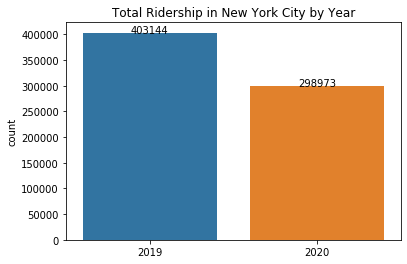

In [28]:
# An overivew of total ridership by year
sns.countplot(data = df_clean, x = 'year')

for i in range(2):
    year_list = list(ridership_count.index)
    count = ridership_count[year_list[i]]
    plt.text(i, count+1, count, ha = 'center')
    
plt.xlabel("")
plt.title("Total Ridership in New York City by Year");

The total ridership drop in 2020. Let's look ab the break down of ridership by month to investigate the trend

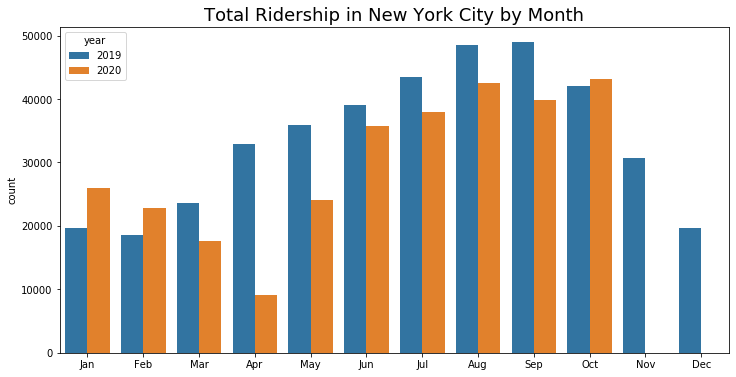

In [29]:
# Now, break down to monthly ridership, by each year
month_list = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize = [12,6])

ax = sns.countplot(data=df_clean, x = 'month', hue = 'year')

plt.xticks(np.arange(0,12), month_list)
plt.xlabel("")
plt.title("Total Ridership in New York City by Month", fontsize = 18);

In year **2019**, there bike ridership seeing **increasing trend from March to September** and then turning to downward trend until end of year (Dec). To check if this trend is partly contributed by the weather in NYC, I get the overal weather trend in NYC from [this website](https://www.nyc.com/visitor_guide/weather_facts.75835/). I extract and populate the related data in below dataframe. I replot the graph by additing the monthly mean temperature to the chart.

In [30]:
# Weather trend in NYC
nyc_season = {'month':list(np.arange(1,13)),
             'season': ['Winter','Winter', 'Spring','Spring','Spring',
                       'Summer','Summer,', 'Summer', 'Fall','Fall',
                        'Fall','Winter'],
             'mean_temp_C':[0,1,6,11,17,22,25,24,21,14,9,3]}
nyc_season = pd.DataFrame(nyc_season)

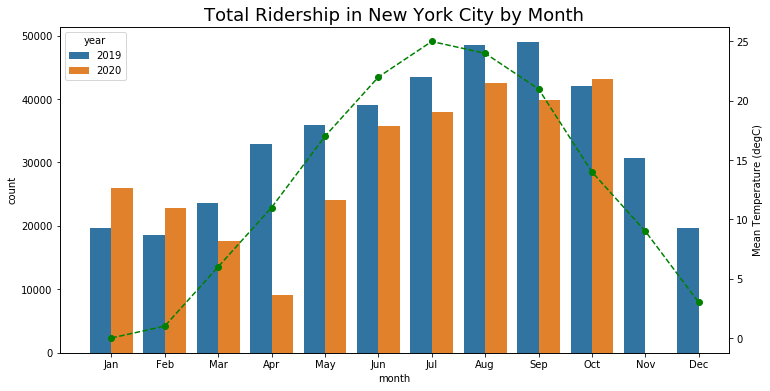

In [31]:
# Now, break down to monthly ridership, by each year
month_list = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize = [12,6])

ax1 = sns.countplot(data=df_clean, x = 'month', hue = 'year')
ax2 = ax1.twinx()
ax2.plot(nyc_season['month']-1, nyc_season['mean_temp_C'], 'go--')
ax2.set_ylabel("Mean Temperature (degC)")

plt.xticks(np.arange(0,12), month_list)
plt.xlabel("")

plt.title("Total Ridership in New York City by Month", fontsize = 18);

Thus, in year **2019** the ridership trend has some positive correlation with the city's weather. **Lowest ridership** in the winder month (**Dec - Feb**), and highest ridership in warmer weather, ie. Spring (**Apr - Jun**) and Summer (**Jul-Aug**). It turns go to downward trend during Autumn, when the tempearture reduces (**Oct-Nov**).

In year **2020**, higher monthly ridership observed in the begining of the year (Jan - Feb), compared to same period in year 2019. However, the ridership continue in downward trend in March, and dip in month of April. This is believed to be affected by the **covid-19 pandemic** where New York sate issued a stay-at-home order, limiting outdoor activities to the essentials and imposing social-distancing guidelines when outside the home on 22 March. Ridership turns to upward trend from month of May. Though in the ridership continue in upward trend from May onwards, the total number of ridership is lesser compared to same period in year 2019, until Sep. In Oct, 2020 ridership is slightly more, compared to same period in year 2019. The mobility trend in general is believed to be significantly impacted by covid-19 pandemic and it will be interesting to find out more on how the trend of ridership impacted by Covid-19 in 2020.

[coronavirus on ridership impact](https://citymonitor.ai/transport/the-decisions-cities-made-about-coronavirus-had-a-big-impact-on-bike-share-ridership#:~:text=Despite%20there%20being%20fewer%20trips,2020%2C%20versus%2013%2C350%20in%202019.)

#### 2.1.2 Bike usage
I am interested to find out, how many times the bike is used per day, on average for every month. 

In [32]:
# create another column for day from the starttime
df_clean['day'] = df_clean.starttime.dt.day

In [33]:
# create new dataframe, that count the bike usage for each bikeid, by day
# i.e.: how many rides for each bikeid within a day
bikeUsage_count = df_clean.groupby(['year','month', 'day', 'bikeid'])['bikeid'].count().reset_index(name = 'count')
bikeUsage_count.head()


,year,month,day,bikeid,count
0,2019,1,1,26153,1
1,2019,1,1,26155,1
2,2019,1,1,26161,1
3,2019,1,1,26164,3
4,2019,1,1,26174,6


On average, the daily bike usage is 3.4/bike in 2019, and 3.3/bike in 2020. 

In [34]:
# Average daily bike used, by year
bikeUsage_count.groupby(['year'])['count'].mean()

year
2019    3.433877
2020    3.262366
Name: count, dtype: float64

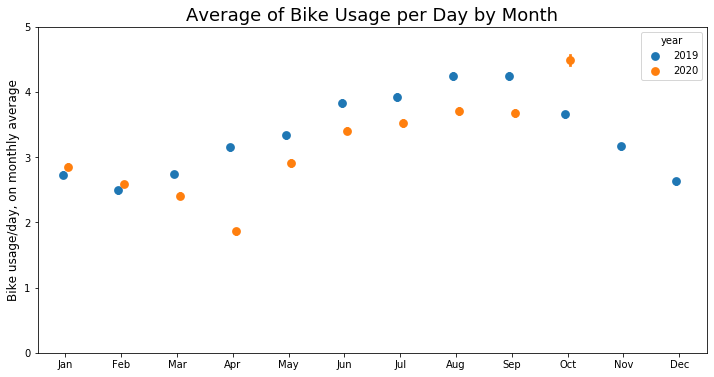

In [35]:
# I break down the bike usage by month, to check the trend for both year

plt.figure(figsize = [12, 6])
sns.pointplot(data=bikeUsage_count, x = 'month', y = 'count', hue = 'year', dodge = 0.1,
             linestyles = '')

plt.ylabel("Bike usage/day, on monthly average", fontsize = 12)
plt.ylim(0,5)
plt.xticks(np.arange(0,12), month_list)
plt.xlabel("")
plt.title("Average of Bike Usage per Day by Month", fontsize = 18);

In [36]:
# Average daily bike used, by month
bikeUsage_count.groupby(['year','month'])['count'].mean()

year  month
2019  1        2.730887
      2        2.490990
      3        2.741759
      4        3.151768
      5        3.335250
      6        3.832729
      7        3.919002
      8        4.242578
      9        4.250065
      10       3.655792
      11       3.165087
      12       2.629422
2020  1        2.855461
      2        2.592324
      3        2.406148
      4        1.864137
      5        2.911229
      6        3.406095
      7        3.518178
      8        3.705114
      9        3.677952
      10       4.490474
Name: count, dtype: float64

In year **2019**, each bike is used **3.4** times per day. The daily bike usage's trend is following the ridership trend, with month of Feb having the min, which on average, each bike used **2.5** times per day and peak at month of Sep, each bike used **4.3** times per day.

In year **2020**, each bike is used **3.3** times per day. Similarly, it follows its' ridership trend, with month of **Apr** record the lowest number of bike usage, i.e. just **1.9** times per day. However , it record the highest bike used of **4.5** times per day in Oct, even higher than the same period last year, i.e. Oct 2019.

#### 2.1.3 Average trip duration
75 percentile of trip is less than 14 minutes, based on the data that removing the outliers of single total trip of exceeding 2 hours (120 min). 

In [37]:
# convert trip duration from seconds to minutes instead
df_clean['tripduration'] = df_clean['tripduration']/60

In [38]:
# Year 2019
df_clean.query('year == 2019')['tripduration'].describe()

count    403144.000000
mean          8.945143
std          10.419236
min           1.016667
25%           3.883333
50%           5.733333
75%           9.583333
max         119.983333
Name: tripduration, dtype: float64

In [39]:
# Year 2020
df_clean.query('year == 2020')['tripduration'].describe()

count    298973.000000
mean         17.753643
std          19.194550
min           1.016667
25%           5.416667
50%          10.233333
75%          23.266667
max         120.000000
Name: tripduration, dtype: float64

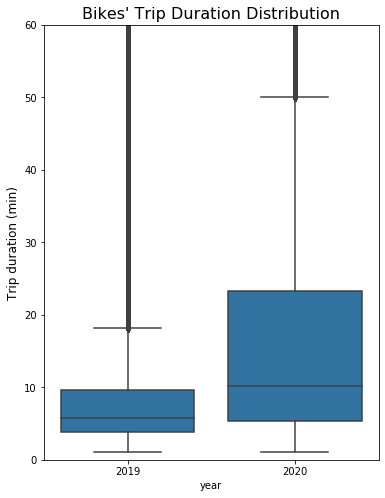

In [40]:
# Visualize the statistics description by year using boxplot
base_color = sns.color_palette()[0]
plt.figure(figsize = (6,8))

sns.boxplot(data = df_clean, x = 'year', y = 'tripduration', color = base_color)
plt.ylabel("Trip duration (min)", fontsize = 12)
plt.ylim(0,60)
plt.title("Bikes' Trip Duration Distribution", fontsize = 16);

In year **2019**, the median trip duration is **5.7 minutes** and with majority (75 percentile) trip duration < 10 min.    
In year **2020**, in contrary, the median trip duration is **10.2 minutes**, almost doubled compared to year 2019. 75 percentile of the trip is < 24 min. The spread is much larger compared to year 2019 as well.   

I would like take a closer look on the trip duration distribution by month. Thus, I plot the histogram by month with below code cell.

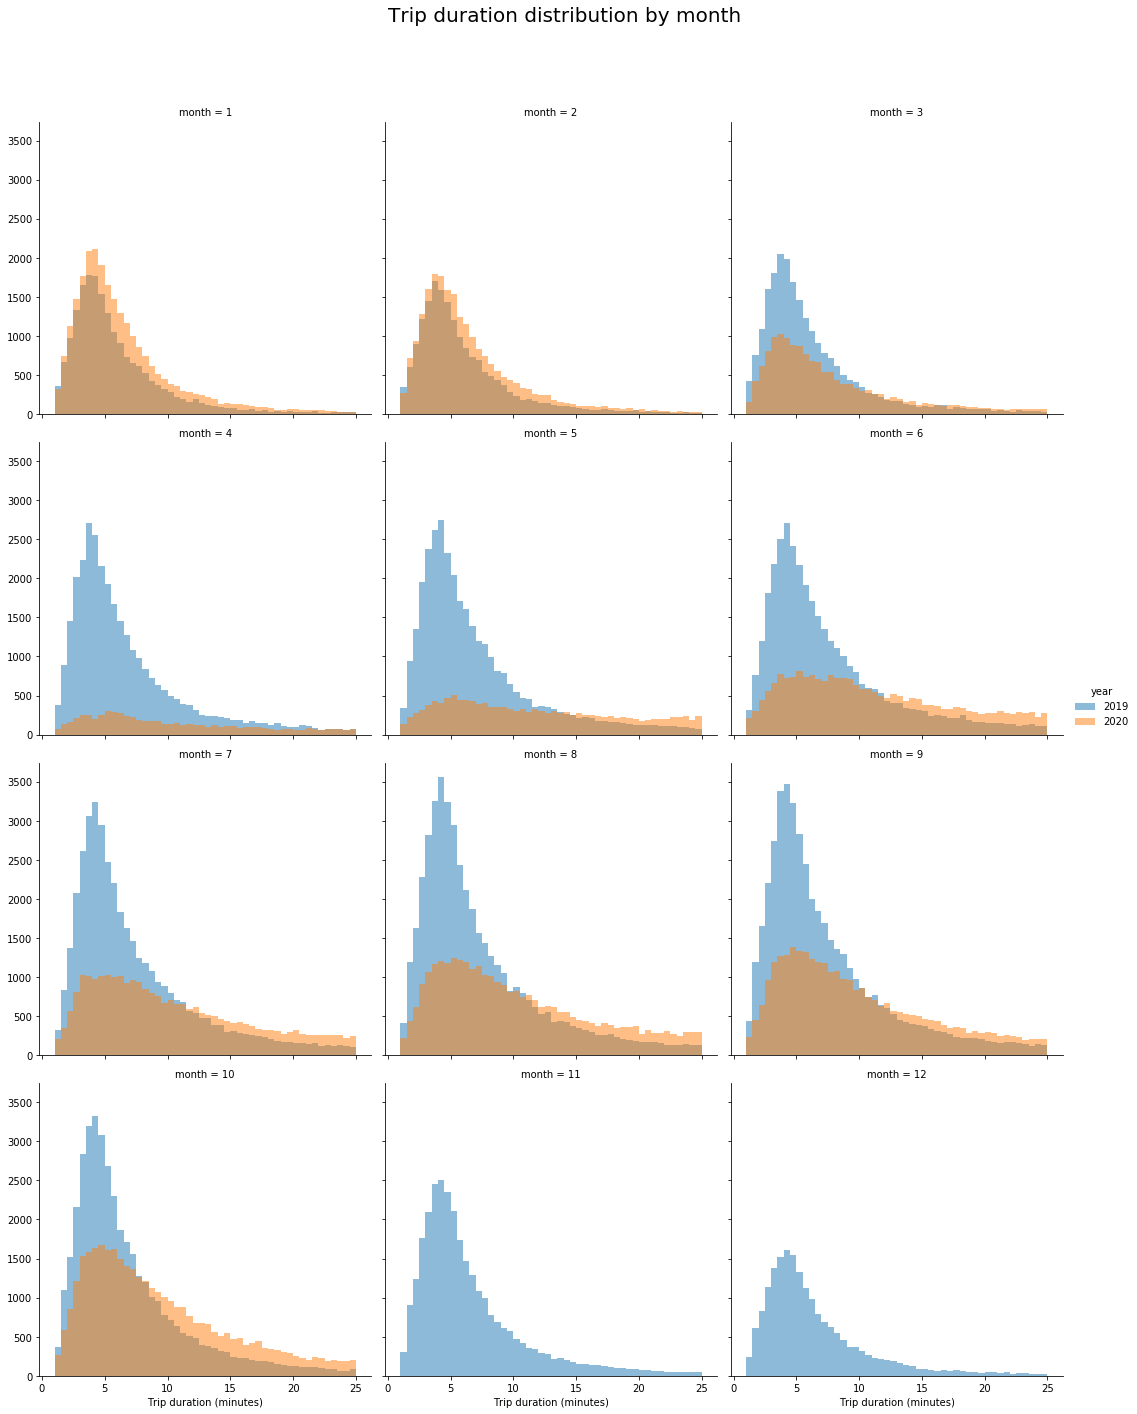

In [41]:
# limit the bin size up to 25 min, that covers 75 percentile of 2020 data
bins = np.arange(1, 25+0.5, 0.5)

g = sns.FacetGrid(data = df_clean, col = 'month', col_wrap = 3, height =5,
                  hue = 'year')
g.map(plt.hist, 'tripduration', bins = bins, alpha = 0.5)
g.set_xlabels("Trip duration (minutes)")
g.add_legend()

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Trip duration distribution by month", fontsize = 20);


There is long tail in the distribution, so I put it on a log scale instead

In [42]:
log_binsize = 0.05
bins = 10** np.arange(0.002, np.log10(df_clean['tripduration'].max())+log_binsize, 
                      log_binsize)

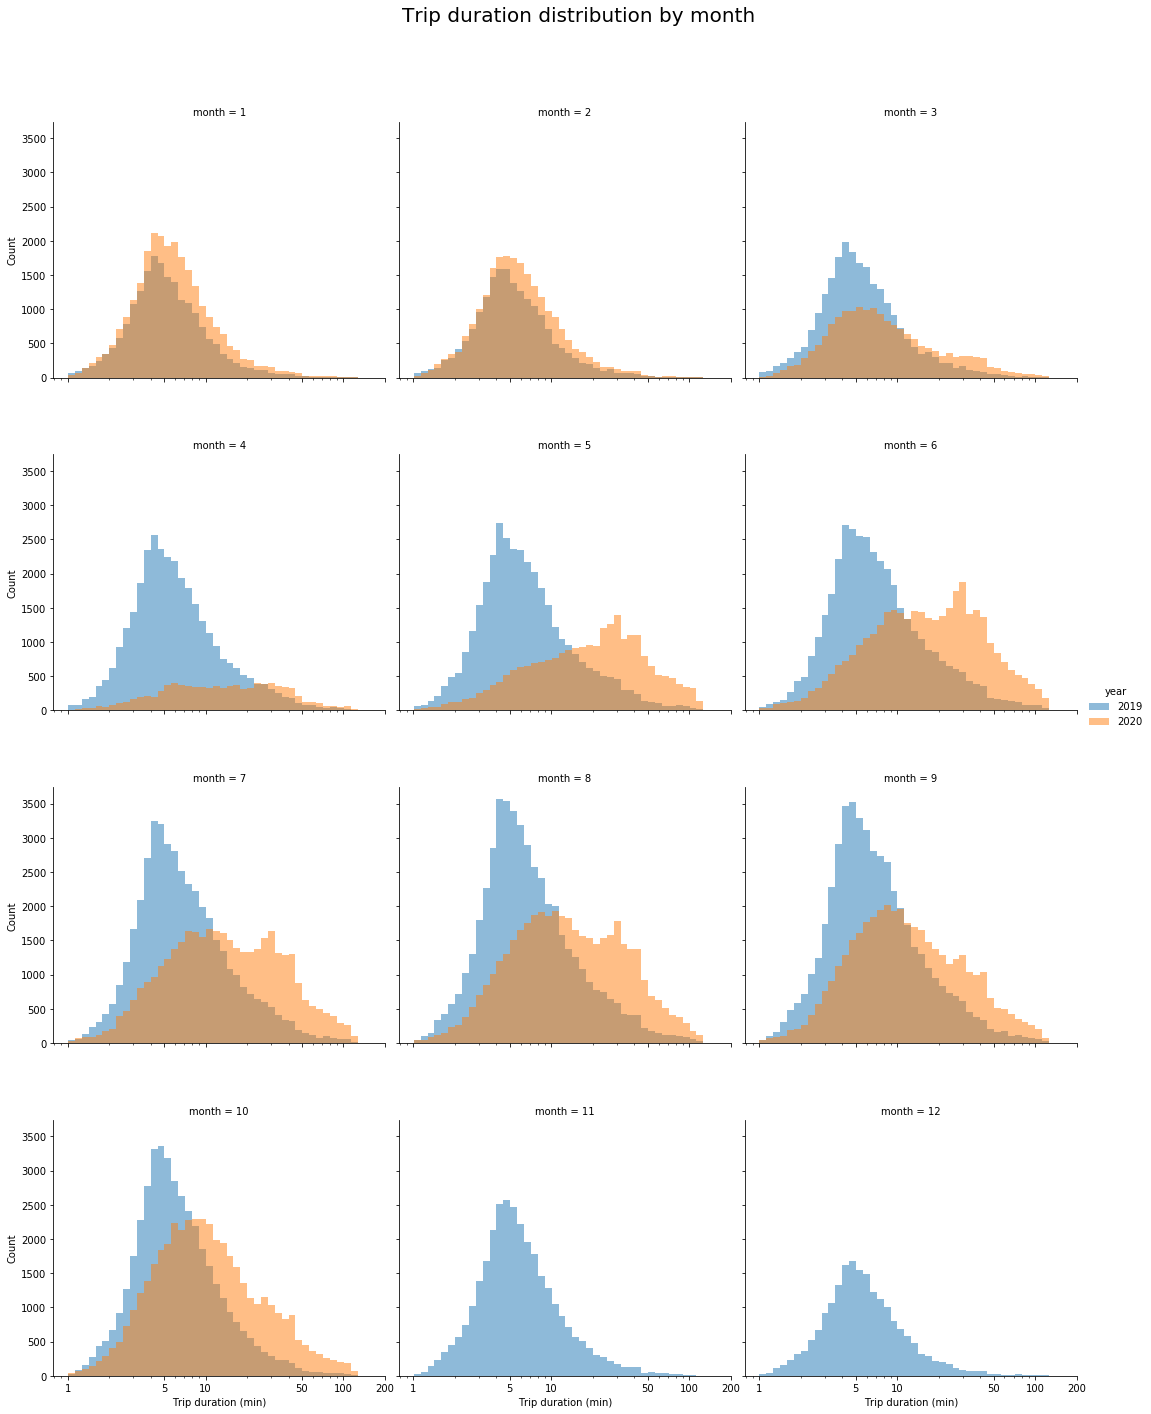

In [43]:
ticks = [1, 5, 10, 50, 100, 200]
labels = [1, 5, 10, 50, 100, 200]

g = sns.FacetGrid(data = df_clean, col = 'month', hue = 'year',
                 col_wrap = 3, height = 5)
g.map(plt.hist, 'tripduration', bins = bins, alpha = 0.5).set(xscale = 'log')

# set x, y labels and legend
g.set_xlabels("Trip duration (min)")
g.set_ylabels("Count")
g.add_legend()

# set xticks
for ax in g.axes:
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
plt.subplots_adjust(hspace = 0.3)
#g.set(xticks = ticks, xticklabels = labels)


# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Trip duration distribution by month", fontsize = 20);

In year **2019**, the trip duration has a long-tailed distribution, with majority trip duration on the shorter time frame (< 10 min). When plotted on a log-scale, the trip duration distribution looks just a little bit of right skew, with peak around **5 min**, for every months. 

In year **2020**, in contrary, only the first 3 months (Jan - March) shared similar shape (right skew with majority trip on shorter time frame, peak around 5 min). The following months, though it still has long-tailed on the right, but in general, is more uniformly distributed. When plotted on a log-scale, there are in general 4 patterns of ditribution observed. **Jan-March** remain similar to year 2019, peak around 5 min. **Apr - Jun**, distribution tends to left skew instead, that is more on longer riding time, with peak around 30-40 min. **July-Aug**, bimodal observed, peak at around 10 min and 30-40min. **Sep-Oct**, the distribution become closer to normal distribution, with peak around 10 min. 

This showed the biking duration shifted (to longer duration), after NYC issued stay-at-home order in March due to covid-19 pandemic, and then slowly shifted back to shorter trip duration after few months, but has yet to go to back to the pre-covid (year 2019) trip duration pattern.

#### 2.1.4 Original and Destination of the Station

In [44]:
print(f"Total start station: {df_clean['start station name'].nunique()}")
print(f"Total end station: {df_clean['end station name'].nunique()}")

Total start station: 53
Total end station: 133


In [45]:
# count the frequency of unique start and end station
start_station_counts = df_clean['start station name'].value_counts()
end_station_counts = df_clean['end station name'].value_counts()

# get the order of the start and end station name (top 20 only), 
# by starting with most frequent count
num_of_toplist = 20
start_station_order = start_station_counts.index[:num_of_toplist]
end_station_order = end_station_counts.index[:num_of_toplist]

In [46]:
# return the max proportion, i.e. the length of the longest bar
# by taking the count of the most popular start/ end station, 
# divided by the total rows of the df_clean
max_prop_start = start_station_counts[0]/df_clean.shape[0]
max_prop_end = end_station_counts[0]/df_clean.shape[0]
print("Top start station: {} \nTop end station: {}".format(max_prop_start, max_prop_end))

Top start station: 0.09536302354166043 
Top end station: 0.11670846881645082


In [47]:
# produce a set of evenly spaced proportioned values
tick_props = np.arange(0, max_prop_end+0.01, 0.01)

tick_names = ['{:0.2f}'.format(v) for v in tick_props]

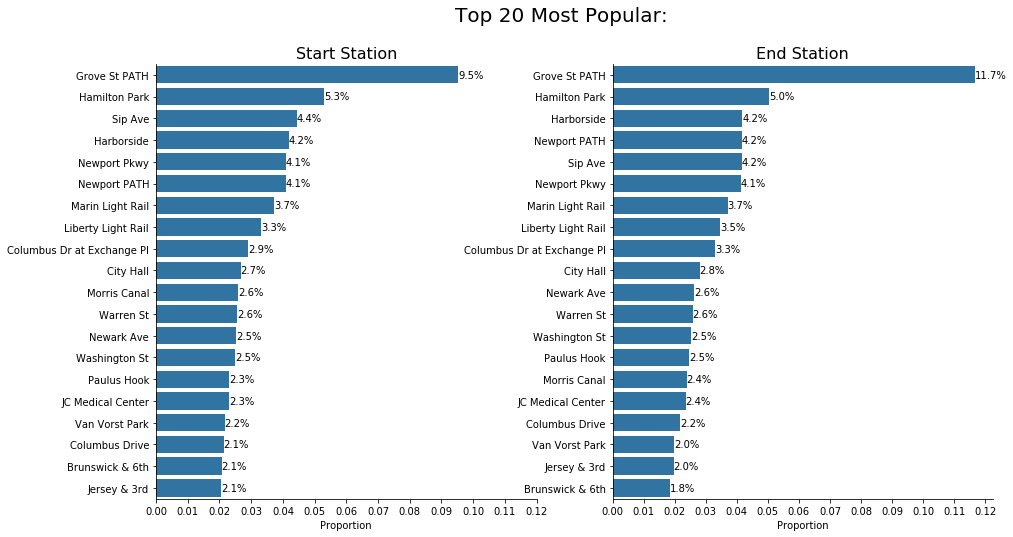

In [48]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [15, 8])
plt.suptitle("Top 20 Most Popular:", fontsize = 20);

# Left: start station 
plt.subplot(1,2,1)
ax1 = sns.countplot(data = df_clean, y = 'start station name', color = base_color,
             order = start_station_order);

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

# label the value at the end of each bar
for i in range(num_of_toplist):
    count = start_station_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_clean.shape[0])
    # x, y, label
    plt.text(count+1, i, pct_string, va = 'center')

#ticks label with relative frequency
plt.xticks(tick_props*df_clean.shape[0], tick_names)
plt.xlabel("Proportion")
plt.ylabel("")
plt.title("Start Station", fontsize = 16);


# Right: end station 
plt.subplot(1,2,2)
ax2 = sns.countplot(data = df_clean, y = 'end station name', color = base_color,
             order = end_station_order);

ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# label the value at the end of each bar
for i in range(num_of_toplist):
    count = end_station_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_clean.shape[0])
    # x, y, label
    plt.text(count+1, i, pct_string, va = 'center')
    
#ticks label with relative frequency
plt.xticks(tick_props*df_clean.shape[0], tick_names)
plt.xlabel("Proportion")
plt.ylabel("")
plt.title("End Station", fontsize = 16);


The top TWO popular start and stop stations are the same, **Grove Street Path** followed by **Hamilton Park**.    
**Grove Street Station** is a station on the PATH train system, which, its popularity might due to people using citibike as last miles of transit between the train system.   
**Hamilton Park** on the other hand, is a beautiful park with stunning view of the city.

It would be interesting to find out, what is the popular route by connecting the start station and end station to be the **biking route**. 

In [49]:
# Feature engineered: route
# create new columne `route` by concatenate start station name and end station name
df_clean["route"] = df_clean['start station name']+ "_to_" + df_clean['end station name']

In [50]:
# count the frequency of unique route
route_counts = df_clean["route"].value_counts()

# get the order of route (top 20 only)
route_order = route_counts.index[:num_of_toplist]

# get the porportion of top most popular route
max_prop_route = route_counts[0]/df_clean.shape[0]
max_prop_route

0.015152745197737698

In [51]:
# produce a set of evenly space proportion
tick_props = np.arange(0, max_prop_route+0.001, 0.001)
tick_names = ['{:0.3f}'.format(v) for v in tick_props]

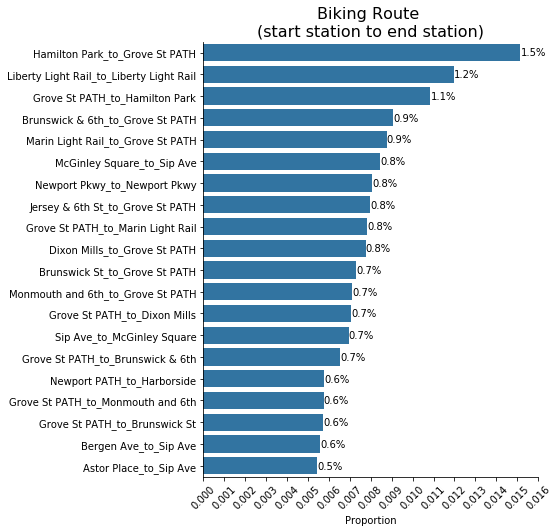

In [52]:
plt.figure(figsize = [6,8])
ax1 = sns.countplot(data = df_clean, y = "route", color = base_color,
             order = route_order);

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

# label the frequency at the end of each bar
for i in range(num_of_toplist):
    count = route_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/df_clean.shape[0])
    plt.text(count+1, i, pct_string, va = "center")
    
#xticks label
plt.xticks(tick_props*df_clean.shape[0], tick_names, rotation = 45)
plt.xlabel("Proportion")
plt.ylabel("")
plt.title("Biking Route \n(start station to end station)", fontsize = 16);

The top route is from the **Hamilton Park to Grove Street Path** and its' opposite (Grove Street Path to Hamilton) turns up to be in the 3rd place.     
Grove Street Path appeared several times in the top 20 routes, either as the start station or destination station of the route. It would be interesting to find out the trend between 2019 and 2020 where I will take a closer look in the Bivariate exploration section

#### 2.1.5 Rider's attribute
I would like to find out the rider's usertype, age group and gender

In [53]:
# count by usertype and gender
usertype_counts = df_clean['usertype'].value_counts()
gender_counts = df_clean['gender'].value_counts()

usertype_order = usertype_counts.index
gender_order = gender_counts.index

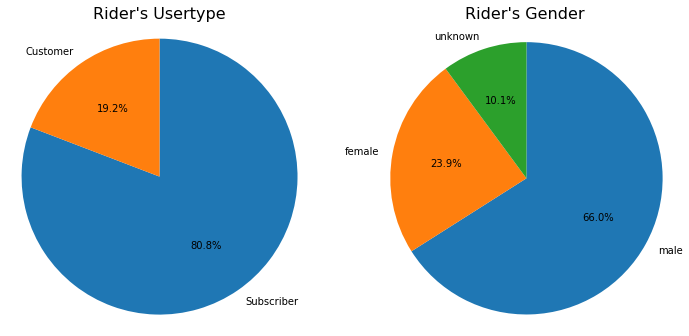

In [54]:
# Visualize Rider's usertype and gender
plt.figure(figsize = [12,6])

plt.subplot(1,2,1)
plt.pie(usertype_counts, labels= usertype_order, autopct='%1.1f%%',
       startangle= 90, counterclock= False)
plt.axis('square')
plt.title("Rider's Usertype", fontsize = 16);

plt.subplot(1,2,2)
plt.pie(gender_counts, labels=gender_order, autopct='%1.1f%%',
       startangle= 90, counterclock= False)
plt.axis('square')
plt.title("Rider's Gender", fontsize = 16);

In [55]:
# Percentage of riders usertype, by year
df_clean.groupby('year')['usertype'].value_counts(normalize = True)

year  usertype  
2019  Subscriber    0.896360
      Customer      0.103640
2020  Subscriber    0.689169
      Customer      0.310831
Name: usertype, dtype: float64

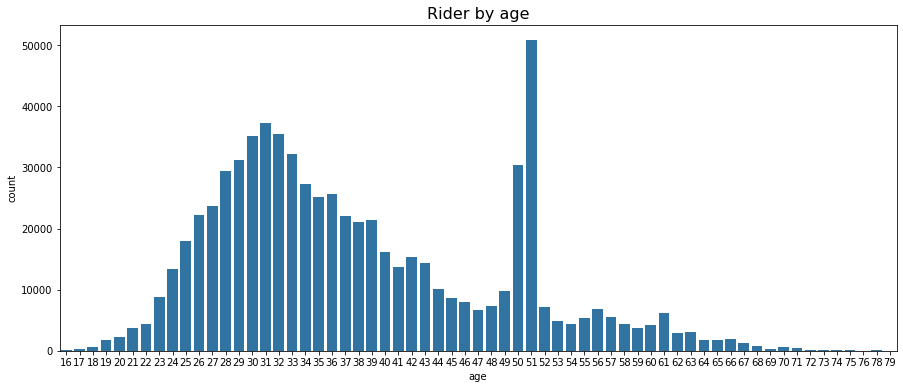

In [56]:
# Rider's age
plt.figure(figsize = [15,6])

sns.countplot(data = df_clean, x = 'age', color = base_color)
plt.title("Rider by age", fontsize = 16);

In [57]:
# Gender of rider at age = 51
df_clean.query('age == 51')['gender'].value_counts()

unknown    43622
male        6071
female      1136
Name: gender, dtype: int64

In [58]:
df_clean.query('age == 51')['usertype'].value_counts()

Customer      42232
Subscriber     8597
Name: usertype, dtype: int64

**Usertype**
Majority of rider is annual member (subscriber), at 80.2%. Though this trend hold in both year 2019 & 2020, share in **Customer** user increases from 10.4% in 2019 to 31.1% in 2020.  
**Gender**
Majority of rider is male, at 65.6%.   
**Age**
The distribution has bimodal shape, with one peak at age of **31** and another much higher peak at age of **51**. It is still not known the accuracy of this data as the vast majority from this age group is from the minority usertype (customer) and unknown gender.

I would like to take a closer look does the trend of like route, tripduration changes based on the user's type. 
In addition, it would be interesting to find out the demographic (i.e. age & gender) of the popular station.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip duration (in minutes) took on a large range of values, so I looked at the data using a log transform. Under the tranformation, the data in year 2019 looks just slightly right skew, and rougly a bit closer to normaly distribution for data in year 2020. Observed trend changes in year 2020, most likely due to the covid-19 pandemic. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the rider's age, calculated field based on the rider's birth year, a small number of outliers observed. The age is at high as up to 132 years old, which is not possible. I remove the row with rider's age at 80 years old and above as it is unlikely for senior at this age still riding bike. After removing the outlier, the distribution of the rider's age is bimodal, with one peak at 31 years old and another much higher and shaper peak at 51 years old. The accuracy of rider's at age 51 is in questions as the vast majority of the rider at this age group is from unknown gender and minority of user type (customer, that is with 1 day or 3 day pass). To keep this ambiguity in mind in my Bivariate exploration.

## 2.2 Bivariate Exploration

> To start off with, I want to look at the pairwise correlations persent between features in the data.

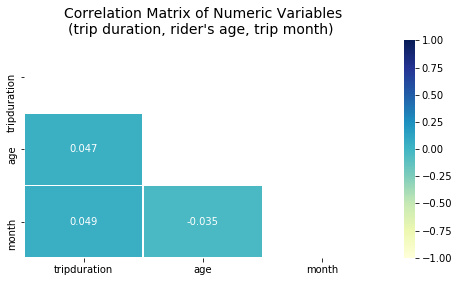

In [59]:
numeric_vars = ['tripduration', 'age', 'month']

# get the correlation coefficient on the numeric variables
data = df_clean[numeric_vars].corr()

# Plot correlation coefficient using heatmap
mask = np.zeros_like(data)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (8,4))
ax = sns.heatmap(data, mask = mask, vmax = 1, vmin = -1, annot = True,
                linewidths = .5, cmap = 'YlGnBu')
ax.set_title("Correlation Matrix of Numeric Variables\n(trip duration, rider's age, trip month) ", fontsize = 14);

In [60]:
# Add in `year` variable to has hue in year in pairplot showed below
numeric_vars.append('year')

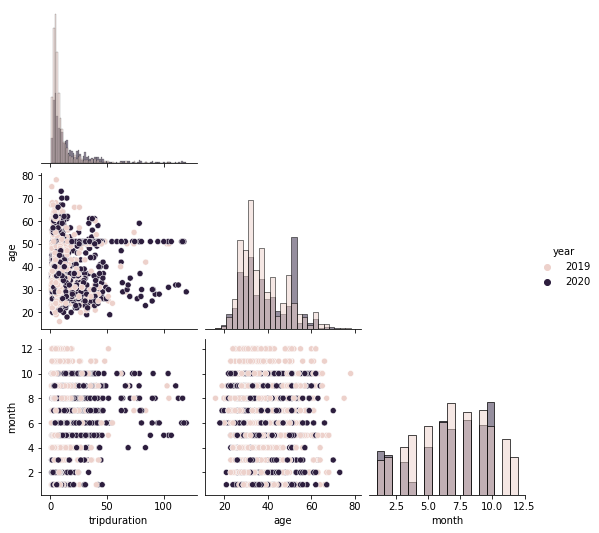

In [61]:
# Plot with very small sample size to render faster
# This is just to roughly view the relationship among the numeric variables
samples = np.random.choice(df_clean.shape[0], 2000, replace = False)

df_sample = df_clean[numeric_vars].iloc[samples]

sns.pairplot(df_sample, hue = 'year', diag_kind='hist', corner = True);

First of all, the dataset is having more categorical variables than numeric variables. Among the numeric variables, results above showed no strong linear correlation. It is counter intuitive that no correlation between trip duration and age.   
Nevertheless, there are a lot of categorical and numerical variables that I would like to explore in this section.

Next, I would like to extend my analysis at trip duration correlate with categorical variables, i.e. usertype, gender, location, and time bound analysis (by month, by day).

In [62]:
df_clean.groupby('year').usertype.value_counts()

year  usertype  
2019  Subscriber    361362
      Customer       41782
2020  Subscriber    206043
      Customer       92930
Name: usertype, dtype: int64

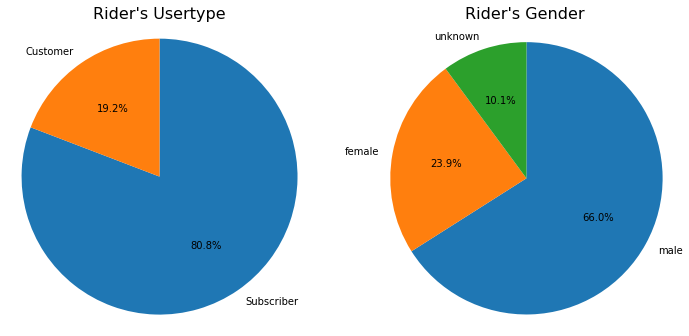

In [63]:
# Visualize Rider's usertype and gender
plt.figure(figsize = [12,6])

plt.subplot(1,2,1)
plt.pie(usertype_counts, labels= usertype_order, autopct='%1.1f%%',
       startangle= 90, counterclock= False)
plt.axis('square')
plt.title("Rider's Usertype", fontsize = 16);

plt.subplot(1,2,2)
plt.pie(gender_counts, labels=gender_order, autopct='%1.1f%%',
       startangle= 90, counterclock= False)
plt.axis('square')
plt.title("Rider's Gender", fontsize = 16);

#### 2.2.1 Trip Duration
1. by Usertype
2. by Gender
3. by location
4. by Time

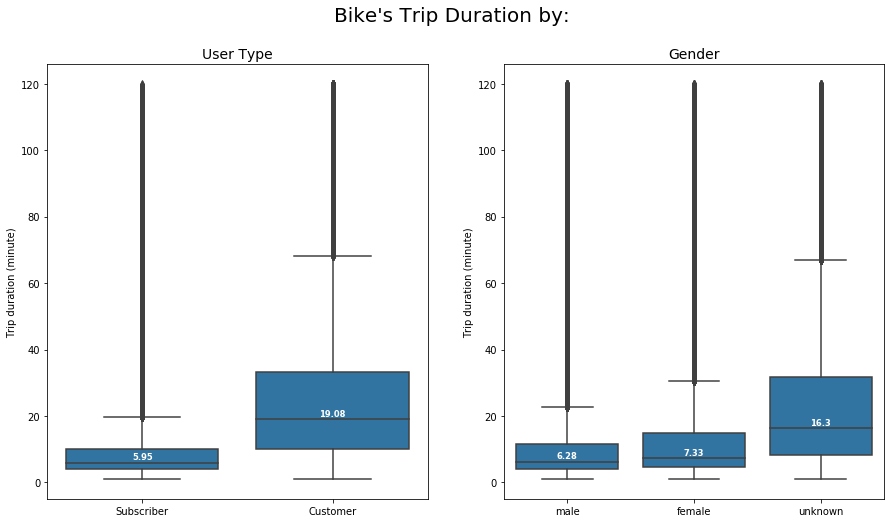

In [64]:
plt.figure(figsize = [15,8])
plt.suptitle("Bike's Trip Duration by:", fontsize = 20);

#Left plot, by user type
plt.subplot(1,2,1)
ax = sns.boxplot(data = df_clean, x = 'usertype', y = 'tripduration',
           color = base_color);
# get the median value
#medians = df_clean.groupby(['usertype'])['tripduration'].median()
medians = [5.95, 19.08]

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + 1, medians[xtick],
            ha = 'center', size = 'small', color = 'w', weight = 'semibold')
    
plt.ylabel("Trip duration (minute)")
plt.xlabel("")
plt.title("User Type", fontsize = 14);

# Right plot, by gender
plt.subplot(1,2,2)
ax = sns.boxplot(data = df_clean, x = 'gender', y = 'tripduration',
           color = base_color);

medians = [6.28, 7.33, 16.3]
# label the median in boxplot
for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick]+1, medians[xtick], ha = 'center',
           size = 'small', color = 'w', weight = 'semibold')

plt.ylabel("Trip duration (minute)")
plt.xlabel("")
plt.title("Gender", fontsize = 14);


Based on the data, if user is Customer **(median = 20 min)** tends to ride longer compared to subscriber **(median = 6min)**.    
In addition, there is not much different in the trip duration by **gender**. However, those with unknown gender has the trip duration doubled.

#### Trip duration by location
I look at the trip duration by the start station location, top 20 route, and least 20 route.

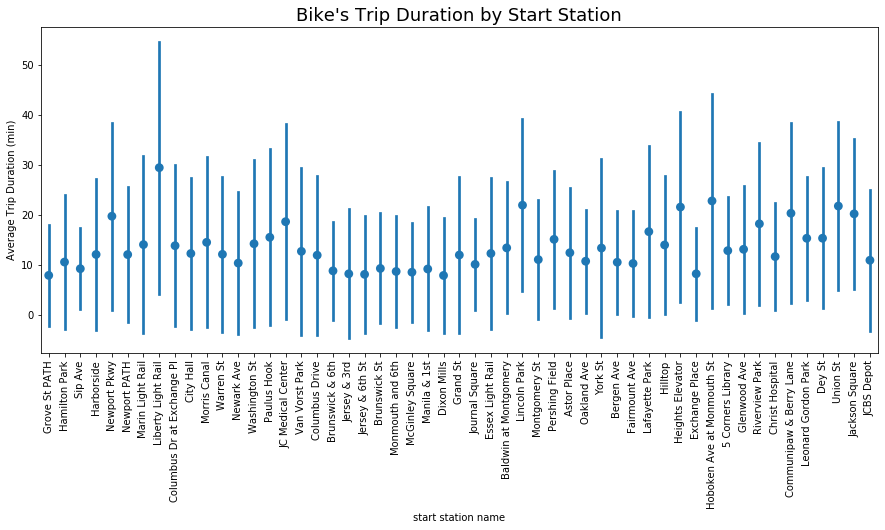

In [65]:
# By start location, ordered from the most popular start station
plt.figure(figsize = [15,6])

sns.pointplot(data = df_clean,  x = 'start station name', y = 'tripduration',
              ci = 'sd', linestyles = "",
              order = start_station_counts.index)
plt.title("Bike's Trip Duration by Start Station", fontsize = 18)
plt.ylabel("Average Trip Duration (min)")
plt.xticks(rotation = 90);

In [66]:
# Get the top 20 routes (route with highest count) and the least 20 routes
top20_route = route_counts[:20].index
least20_route = route_counts[-20:].index

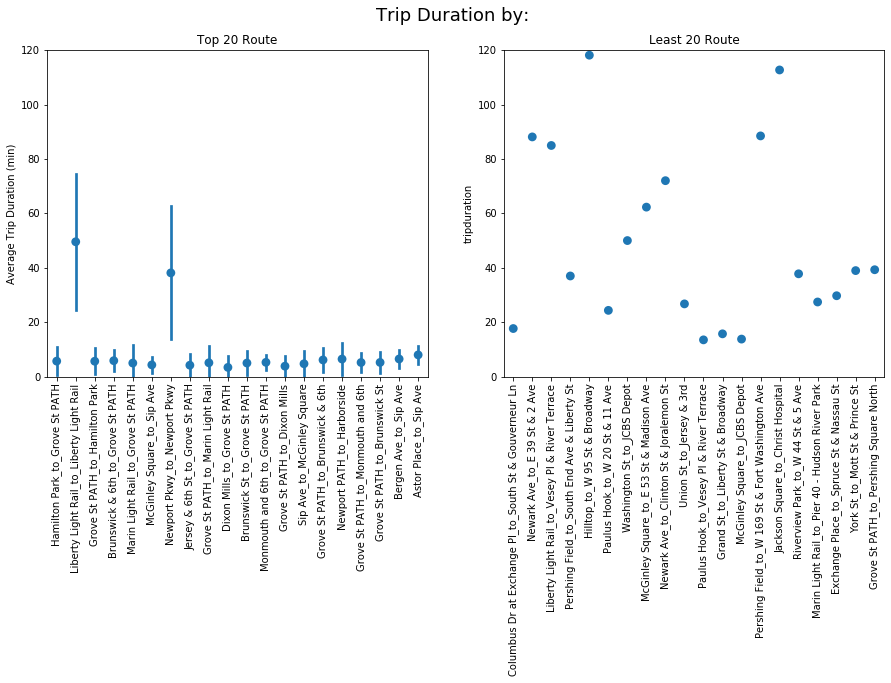

In [67]:
plt.figure(figsize = [15,6])
plt.suptitle("Trip Duration by:", fontsize=18)

#Left: Top 20 route
plt.subplot(1,2,1)
sns.pointplot(data = df_clean.loc[df_clean['route'].isin(top20_route)],  
              x = 'route', y = 'tripduration', 
              ci = 'sd', linestyles = "",
              order = top20_route)
plt.ylabel("Average Trip Duration (min)")
plt.ylim(0,120)
plt.xlabel("")
plt.title("Top 20 Route")
plt.xticks(rotation = 90);

#Right: Least 20 route
plt.subplot(1,2,2)
sns.pointplot(data = df_clean.loc[df_clean['route'].isin(least20_route)],  
              x = 'route', y = 'tripduration',
              ci = 'sd', linestyles = "",
              order = least20_route)
plt.ylim(0,120)
plt.xlabel("")
plt.title("Least 20 Route")
plt.xticks(rotation = 90);

There is not much significant trend in terms of mean single trip duration, if based on start station location, arrange according to its' popularity.

However, there is much shorter trip duration, around **10 min** for the mean single trip from the **top 20 route**. There are two routes, have much longer trip duration and with much larger spread. These are the **round** trip, that is with the same start and end station location.

Whereas, no siginificant trend on the **least popular 20 route**, with trip duration scatter from very short to up to 120 min trip.

In [68]:
# Get the hour from starttime
df_clean['hour'] = df_clean['starttime'].apply(lambda x:x.hour)

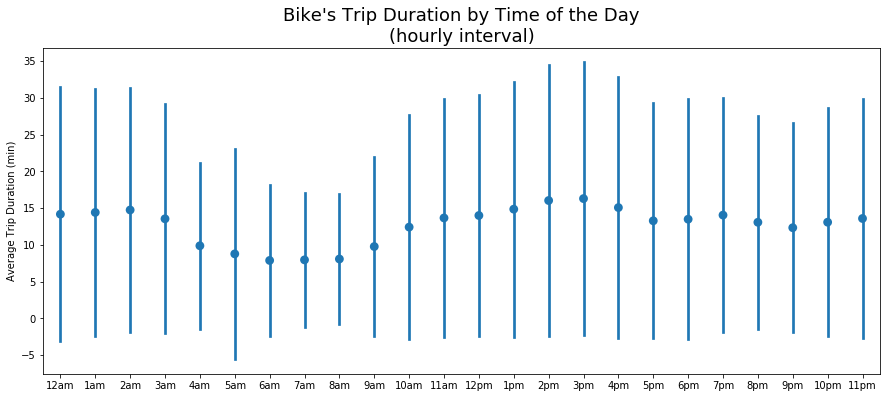

In [69]:
# Trip duration by time of the day
plt.figure(figsize = [15,6])

ax = sns.pointplot(data = df_clean, x = 'hour', y = 'tripduration',
             ci = 'sd', linestyles = "", )

plt.title("Bike's Trip Duration by Time of the Day\n(hourly interval)", fontsize = 18)
plt.ylabel("Average Trip Duration (min)")
ticks_label = ['12am', '1am', '2am', '3am', '4am', '5am', '6am',
               '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm',
              '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xticks(ax.get_xticks(), ticks_label)
plt.xlabel("");

Shorter average single trip duration, around **10 min** between 6am- 9am. 
Longer average single trip duration in the afternoon , longest between 2pm = 4pm. 

#### 2.2.2 Trips frequency by time
Next, I would like to find out when is the most frequent trip take.
First, I look at the trend by day of week, and secondly followed by hour of day.

In [70]:
# create a column to extract day of week from the starttime
df_clean['day_of_week'] = df_clean['starttime'].map(lambda x: x.isoweekday())

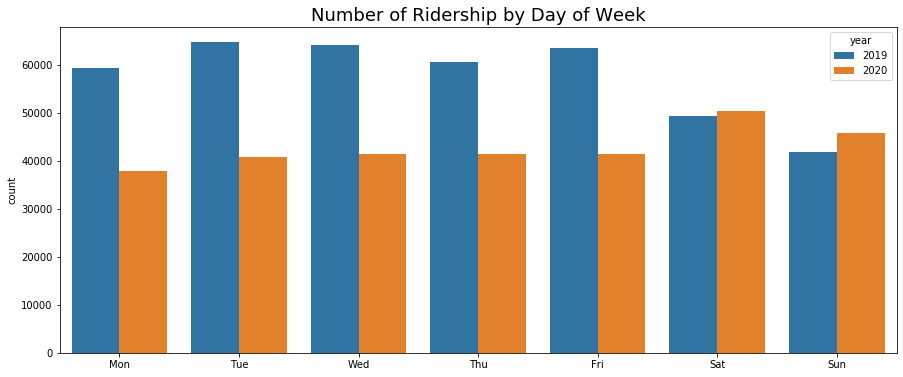

In [71]:
# Countplot: day of week
plt.figure(figsize = [15,6])

day_list = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = sns.countplot(data=df_clean, x = 'day_of_week', hue = 'year')

plt.title("Number of Ridership by Day of Week", fontsize = 18)
plt.xticks(ax.get_xticks(), day_list)
plt.xlabel("");

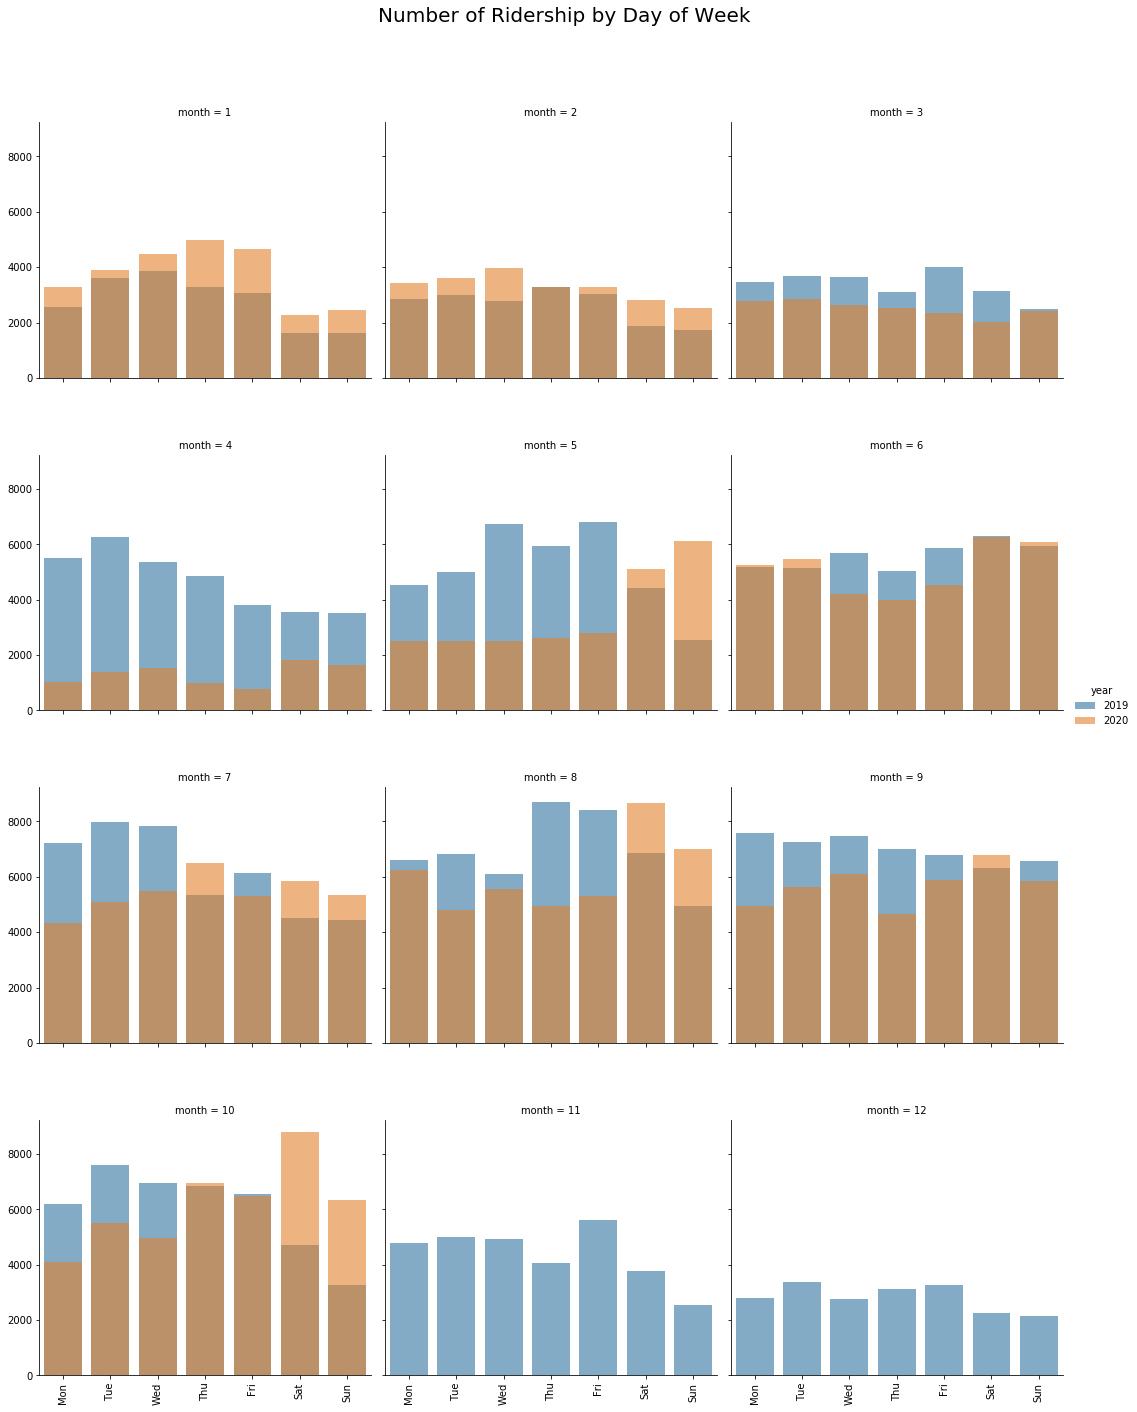

In [72]:
# Facet by month of the year, countplot for trips frequency by day of week
g = sns.FacetGrid(data = df_clean, col = 'month', hue = 'year',
                 col_wrap = 3, height = 5)
g.map(sns.countplot, 'day_of_week', alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(day_list, rotation = 90)
plt.subplots_adjust(hspace = 0.3)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Day of Week", fontsize = 20);

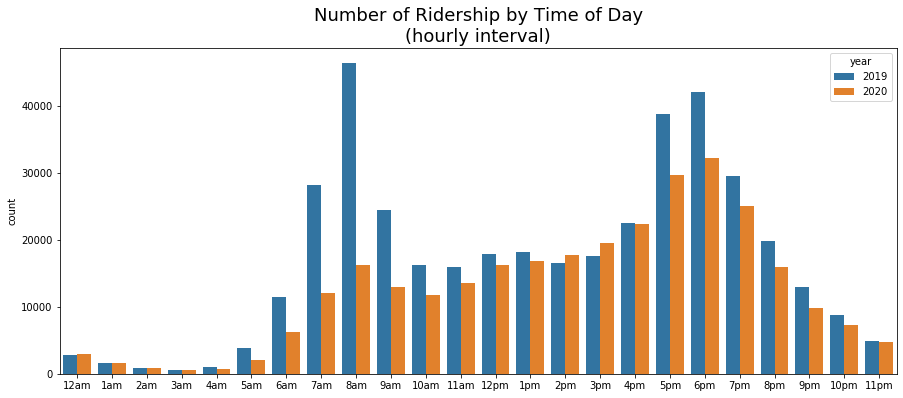

In [73]:
# Countplot: time of day
plt.figure(figsize = [15,6])

ax = sns.countplot(data=df_clean, x = 'hour', hue = 'year')
plt.title("Number of Ridership by Time of Day\n(hourly interval)", fontsize = 18)
plt.xticks(ax.get_xticks(), ticks_label)
plt.xlabel("");

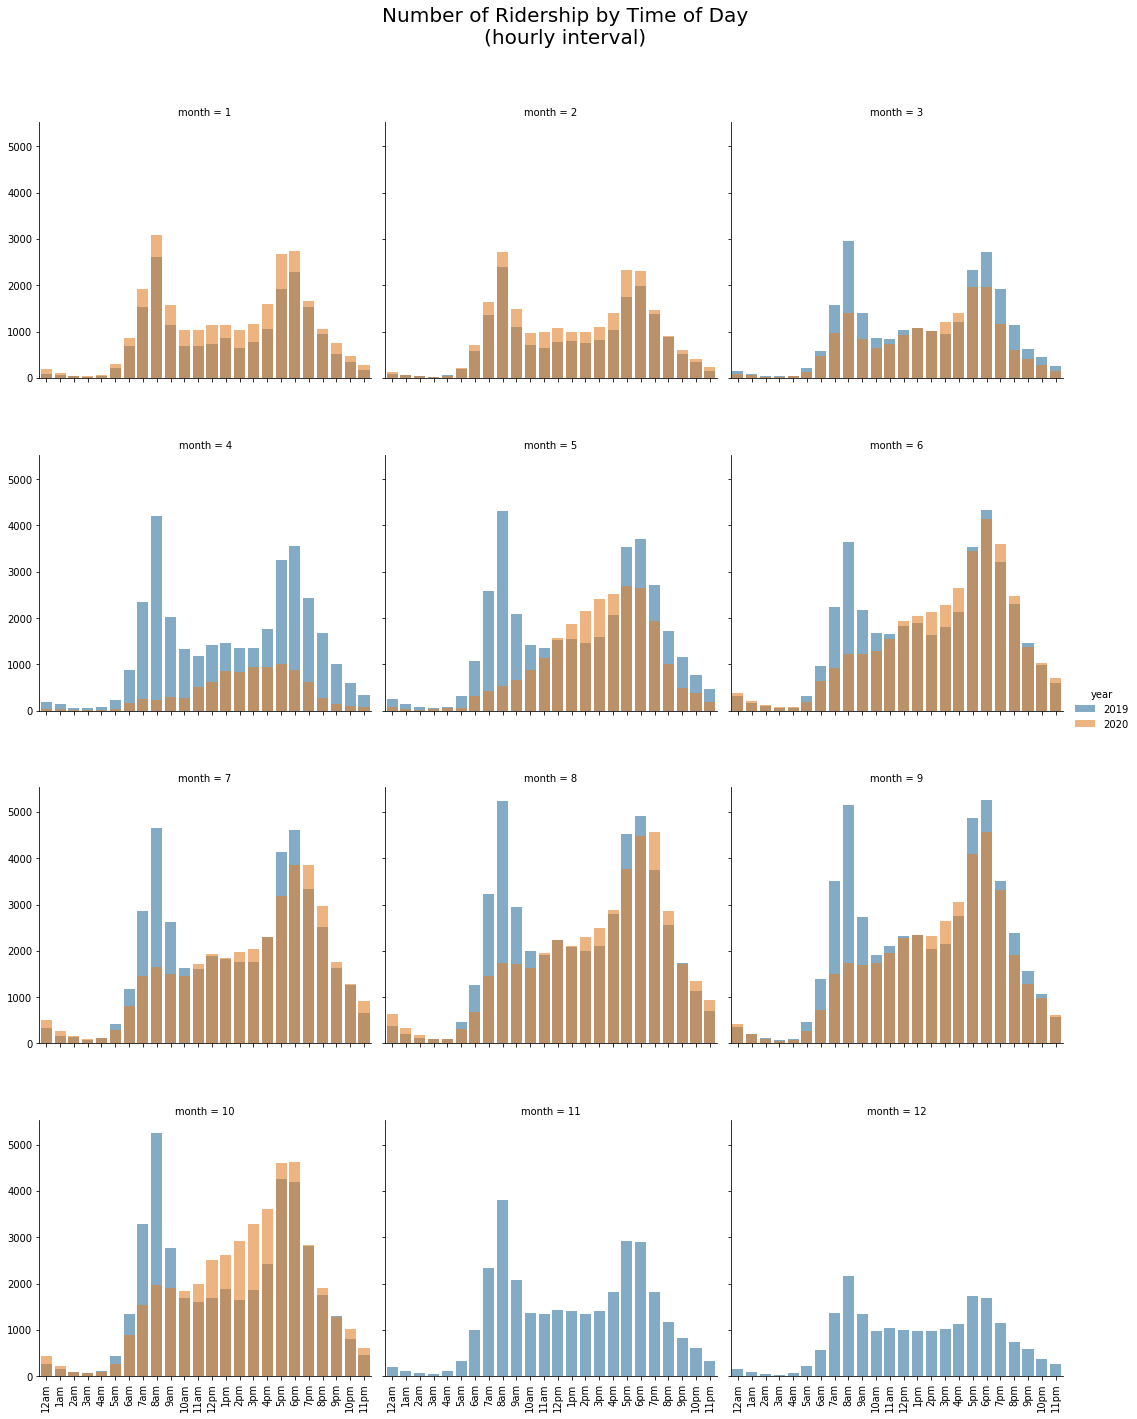

In [74]:
# Facet by month of the year, countplot for trips frequency by time
g = sns.FacetGrid(data = df_clean, col = 'month', hue = 'year',
                 col_wrap = 3, height = 5)
g.map(sns.countplot, 'hour', alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(ticks_label, rotation = 90)
plt.subplots_adjust(hspace = 0.3)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Time of Day\n(hourly interval)", fontsize = 20);

In year **2019**, in general, number of riderships is **more during weekdays** compared to weekend.
The number of ridership by time in terms of time of day is bimodal distribution, with first peak at **8-9am** and second peak at **5-7pm**. This trend is consistent for all months in 2019. This shows people tends to use Citi Bike as the form of transit to and back from work. 

In year **2020**, same trends observed in the first two months (Jan - Feb), and in fact, the number of riderships increases compared to same period of previous year. 
For ridership by day of week, the trend shifted to be **more riderships during weekends** from **Apr** onwards. This changed the overall ridership by day of week in 2020 to be more riderships during weekends compared to weekdays.  
For riderships by time of day, in **March** the trend is in transitioning and moving towards **left skew** distribution. The peak is at **5-7pm** between **June-Oct**. 

This shows the impact of covid-19 to the response bike sharing systems. Ridership plummeting when NYC is under the lockdown restrictions in late March. But the trend of ridership changes in the new normal after the lockdown eases.

#### 2.2.3 Trips frequency by location
Next, I would like to find out any trend changes in terms of the popular location.

In [75]:
# Get start station list order by its popularity in year 2019, 2020
start_station_counts2019 = df_clean.query('year == 2019')['start station name'].value_counts()
start_station_counts2020 = df_clean.query('year == 2020')['start station name'].value_counts()

In [76]:
# Union top 20 start station list for year 2019 and 2020
start_station_list = start_station_counts2019.index[:20].to_list()

# loop to add in list from 2020, but not in 2019 top 20 
for station in start_station_counts2020.index[:20]:
    if station not in start_station_counts2019.index[:20]:
        start_station_list.append(station)

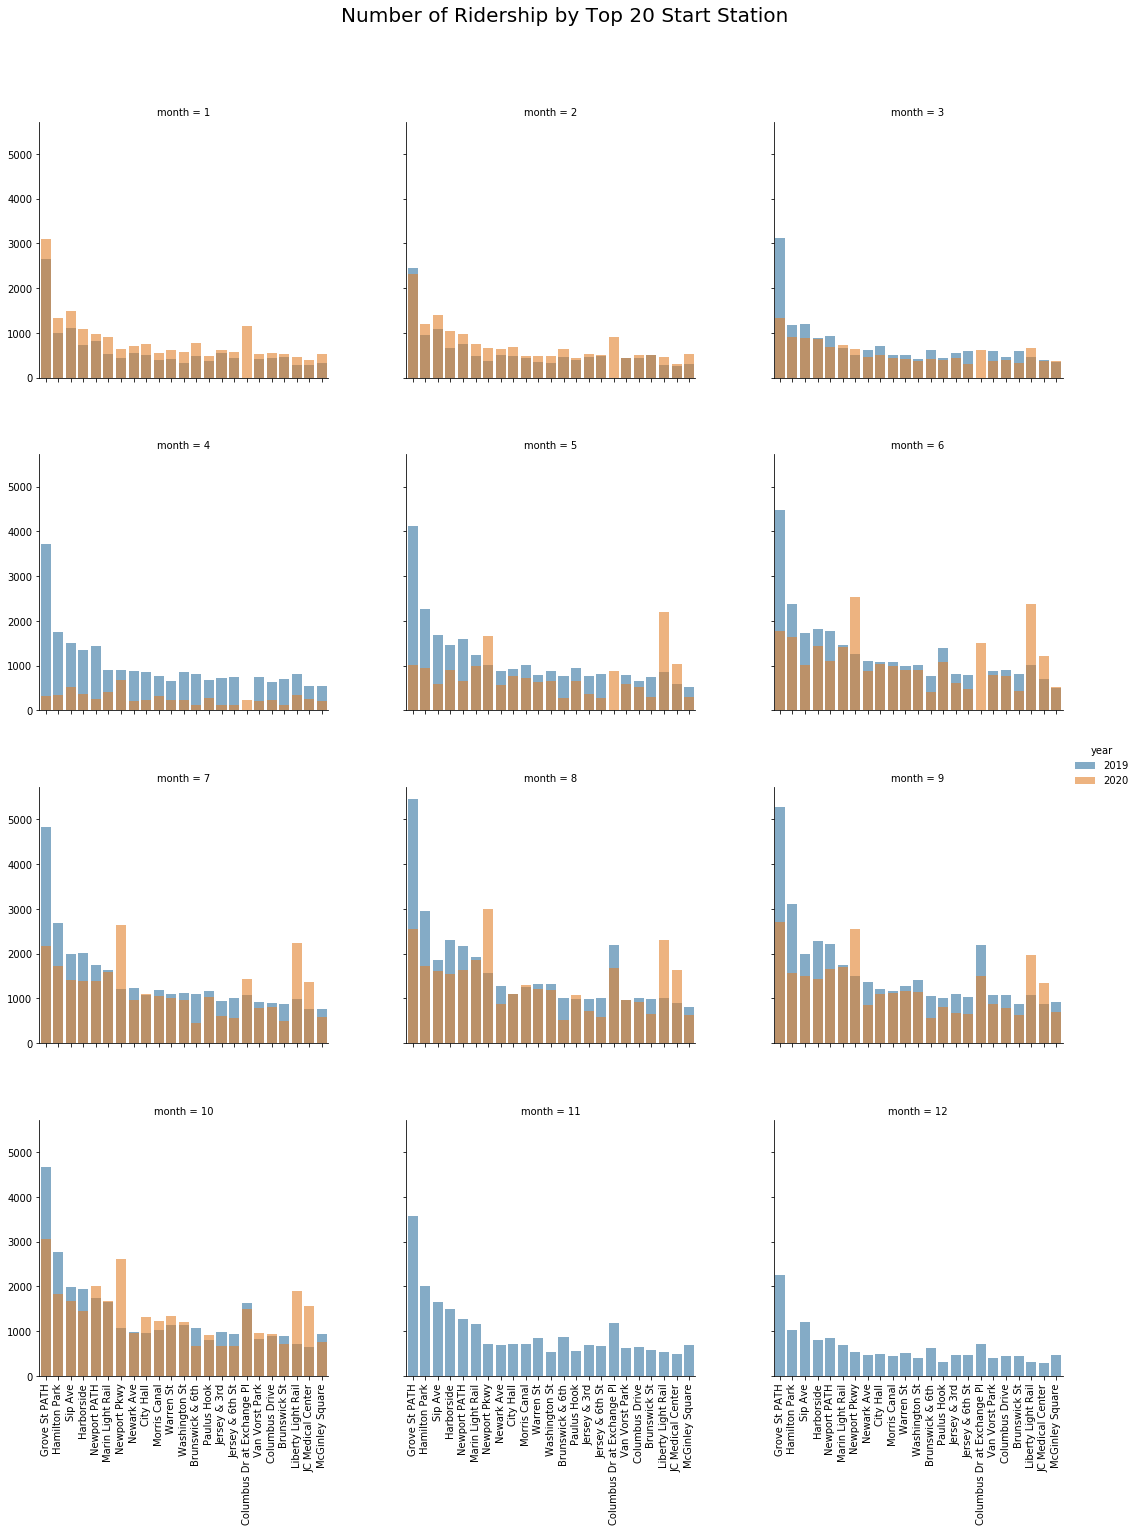

In [77]:
g = sns.FacetGrid(data = df_clean, col = 'month', hue = 'year',
                 col_wrap = 3, height = 5)
g.map(sns.countplot, 'start station name', order = start_station_list,
      alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(start_station_list, rotation = 90)
plt.subplots_adjust(hspace = 0.3)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Top 20 Start Station", fontsize = 20);

In year **2019**, **Grove St PATH** make up as the top 1 popular start station. Asides, it was observed that, Columbus Dr at Exchange Pl starting to make it into the top 20 start station list in July and increasingly gaining its popularity till end of 2019.

In year **2020**, in month Jan-Feb, Columbus Dr at Exchange Pl is in the top 5 list. Again, covid-19 has changed the popular trip location. Grove St PATH no longer be the **distinct top 1 popular start station spot. Newport Pkwy, Liberty Light Rail, JC Medical Center** move into top 5 list. In **Oct**, though the 3 station continue to be popular, Grove St PATH making its way to be the top 1 popular station again. 

I am now looking at the trend of the popular route.

In [78]:
# Get route list, order in terms of its popularity, in year 2019, 2020
route_counts2019 = df_clean.query('year == 2019')['route'].value_counts()
route_counts2020 = df_clean.query('year == 2020')['route'].value_counts()

In [79]:
# Union top 10 route list for year 2019 and 2020
route_list = route_counts2019.index[:10].to_list()

# loop to add in list from 2020, but not in 2019 top 20 
for route in route_counts2020.index[:10]:
    if route not in route_counts2019.index[:10]:
        route_list.append(route)

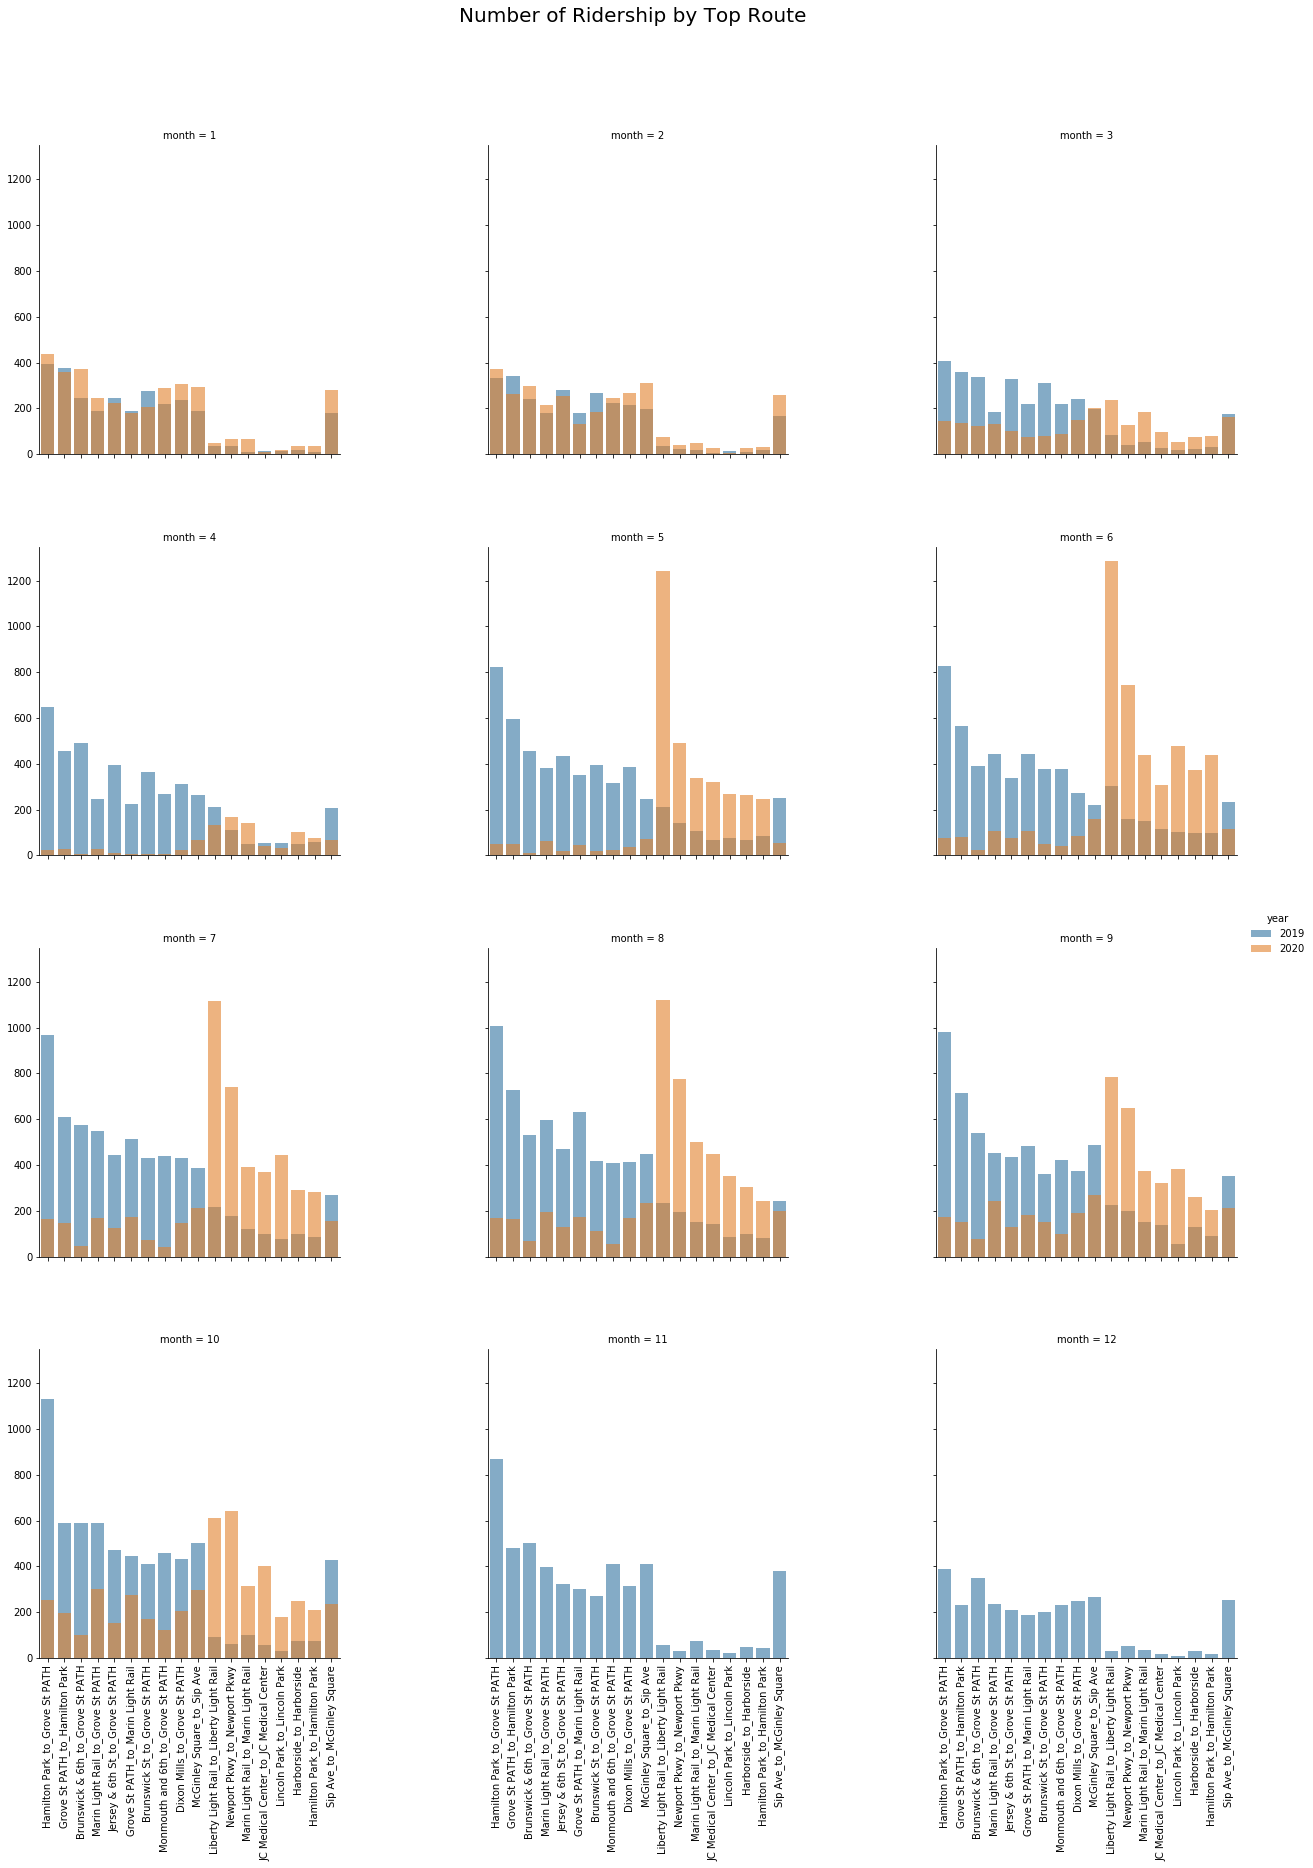

In [80]:
g = sns.FacetGrid(data = df_clean, col = 'month', hue = 'year',
                 col_wrap = 3, height = 6)
g.map(sns.countplot, 'route', order = route_list,
      alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(route_list, rotation = 90)
plt.subplots_adjust(hspace = 0.3)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Top Route", fontsize = 20);

In year 2019, **Hamilton Park_to_Grove St PATH** consistently top the list throughout the year. In addition, **Grove St PATH** appeared in every **TOP 5 route**. 

In year 2020, in month Jan-Feb, the trend is similar to previous year same period. However, covid-19 has huge impact on the popularity of the route and the trend change starting in **March**. The **top 5** route are **all round trip (same start and end station)** with **Liberty Light Rail_to_Liberty Light Rail** top the list. 

I would like to find out what is the **percentage of round trip** and its' trend, particularly in year 2019 compared to covid-19 year of 2020.


In [81]:
# create a column to list out if it is a round trip
df_clean['is_roundtrip'] = (df_clean['start station name'] == df_clean['end station name']).astype(int)

In [82]:
# calculate the % of round trip
round_trip_pct = df_clean.groupby(['year','month'])['is_roundtrip'].value_counts(normalize = True)

# keep only data with round trip only (i.e. start station = end station)
# make it a dataframe
round_trip_pct = round_trip_pct.reset_index(name='pct').query('is_roundtrip == 1')
# get the percentage value, by multiply with 100
round_trip_pct['pct'] = round_trip_pct['pct']*100

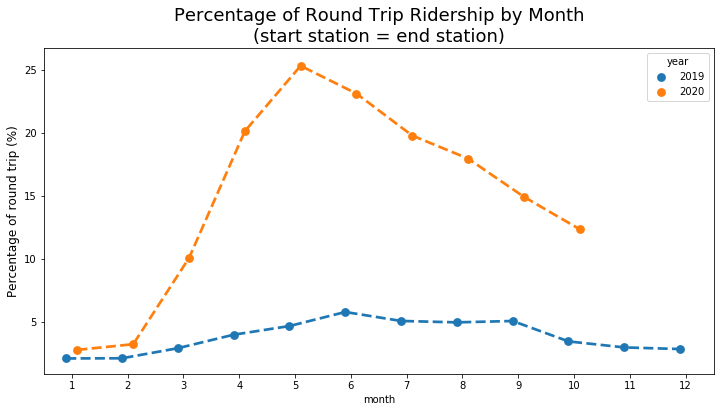

In [83]:
plt.figure(figsize = [12, 6])
sns.pointplot(data=round_trip_pct, x = 'month', y = 'pct', hue = 'year', dodge = 0.2,
             linestyles = '--')

plt.ylabel("Percentage of round trip (%)", fontsize = 12)
plt.title("Percentage of Round Trip Ridership by Month\n(start station = end station)", fontsize = 18);

In [84]:
round_trip_pct.groupby('year')['pct'].mean()

year
2019     3.827427
2020    14.971975
Name: pct, dtype: float64

In year 2019, the round trip percetage is averagely **3.8%**. Higher round trip share observed in warmer month between June to Sept, where it is roughly >= 5%.

Percentage of round trip start seeing sharp rise starting month of **March 2020**, when NYC under lockdown restriction and peak in **May** at 25.3%. It then turns to downward trend in a slower rate, but the round trip share is still much higher than round trip percentage in year 2019.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Ridership trend, in terms of trip duration, ridership frequency by time (hour of the day, month of the year), popular start station and route changes in year 2020, starting from the month when NYC under lockdown restrictions due to Covid-19 pandemic. 
>
> It is also interesting to find out the share in user type changes starting the lockdown restrictions period, where number of ridership by **Customer** increases significantly compared to same period in year 2019.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is rather counter intuitive that no correlationship oberved between the trip duration and user's age. Another abnormal observation found out that, there large number of user age of 50-51, is mainly from minority user type, ie **Customer** with **unknown** gender. 

## 2.3 Multivariate Exploration

> The main thing I want to explore in this part of the analysis is does the trend in previous section varies if a user is a subscriber (local) or customer (less frequent use or tourist).

#### 2.3.1 Trip Duration by user type and time

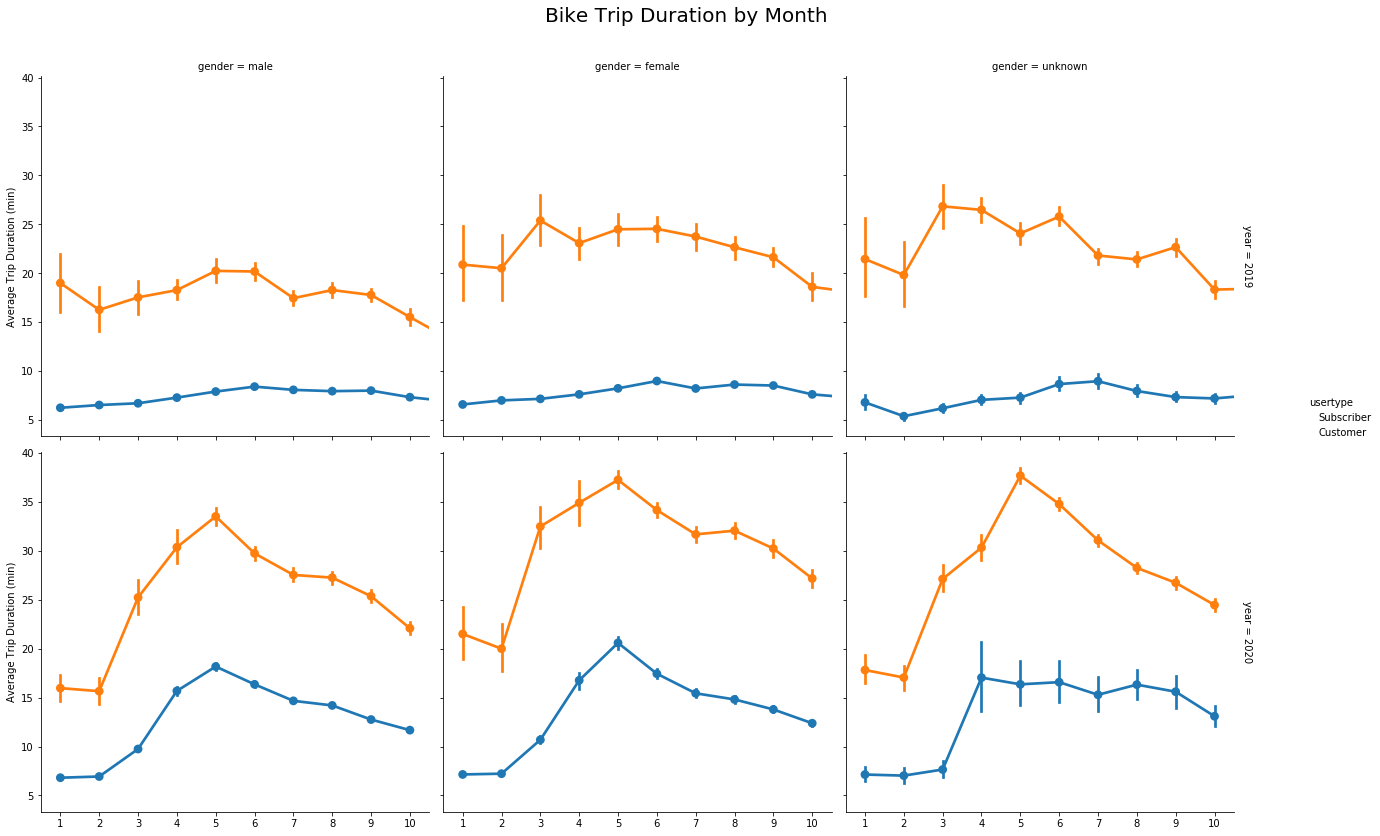

In [85]:
g = sns.FacetGrid(data = df_clean, col = 'gender', row = 'year', 
                  hue = 'usertype', margin_titles = True, size = 6)
g.map(sns.pointplot, 'month', 'tripduration')
g.add_legend()

g.set_ylabels("Average Trip Duration (min)")
g.set_xlabels("");

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Bike Trip Duration by Month", fontsize = 20);

In general, and based on previous section, we know that
on average, trip duration by user type:
- Customer: 26.7 min
- Subscriber: 9.4 min

by gender:
- Male: 10.6 min
- Female: 13.4 min
- Unknown: 24.8 min

The trend of **trip duration is higher if the user is Customer** (orange line for Customer) remain the same, by year. It is also known that from previous section, trip duration in general is higher in year 2020 compared to year 2019.
However, the trend of trip duration by gender varies depending on the user type, and by year.    
In **2019**, the **trip duration on average is the same** regardless of the **gender** status if user is **Subscriber**. If user is **Customer**, **male**'s user remain with shorter trip duration, but **unknown** gender trip duration is similar to female user.       
In **2020**, similar trend as in 2019 if the user is **Subsciber**. If user is **Customer**, **female** user is with longest trip duration, followed by **unknown gender** and **male** user remain with shortest trip duration. The reason for unknown gender on average with longest trip duration is due to the number of unknown gender user increases in year 2020, and in year 2020 trip duration on average is higher than in year 2019.

In [86]:
# Average trip duration by year, usertype and gender
df_clean.groupby(['year','usertype','gender'])['tripduration'].mean()

year  usertype    gender 
2019  Customer    female     22.416199
                  male       17.652497
                  unknown    22.549530
      Subscriber  female      7.928020
                  male        7.499639
                  unknown     7.330730
2020  Customer    female     32.149618
                  male       26.868577
                  unknown    29.869999
      Subscriber  female     13.209332
                  male       12.210260
                  unknown    12.588526
Name: tripduration, dtype: float64

In [87]:
# Number of user by year and gender
df_clean.groupby(['year','gender']).size()

year  gender 
2019  female      91851
      male       285803
      unknown     25490
2020  female      75875
      male       177593
      unknown     45505
dtype: int64

#### 2.3.2 Trip Duration by user type and age
In previous section, it was observed that the no correlation between trip duration and user's age. It was also observed that, there is large number of users at age 50-51 are from **unknown gender** group and **Customer** user type.
I also observed that **unknown gender Customer at 50 years old** user mainly from year 2019 data.   
**unknown gender Customer at 51 years old** increased in year 2020, and mainly from year 2020 data.

This is quite abnormal to have this trend from this particular age group of user. Thus, I removed the **unknown gender user at age 50 & 51** from the data and check is there any correlation between **trip duration** and **age**, and is the trend varies by **user type**.

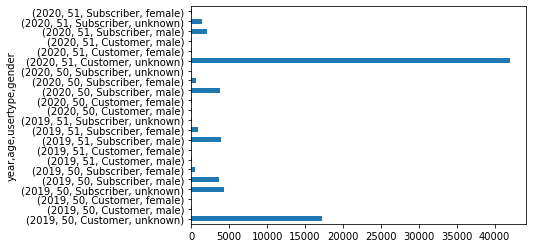

In [88]:
df_clean.query('age == 50 | age == 51')\
.groupby(['year','age','usertype'])['gender'].value_counts().plot(kind = 'barh');

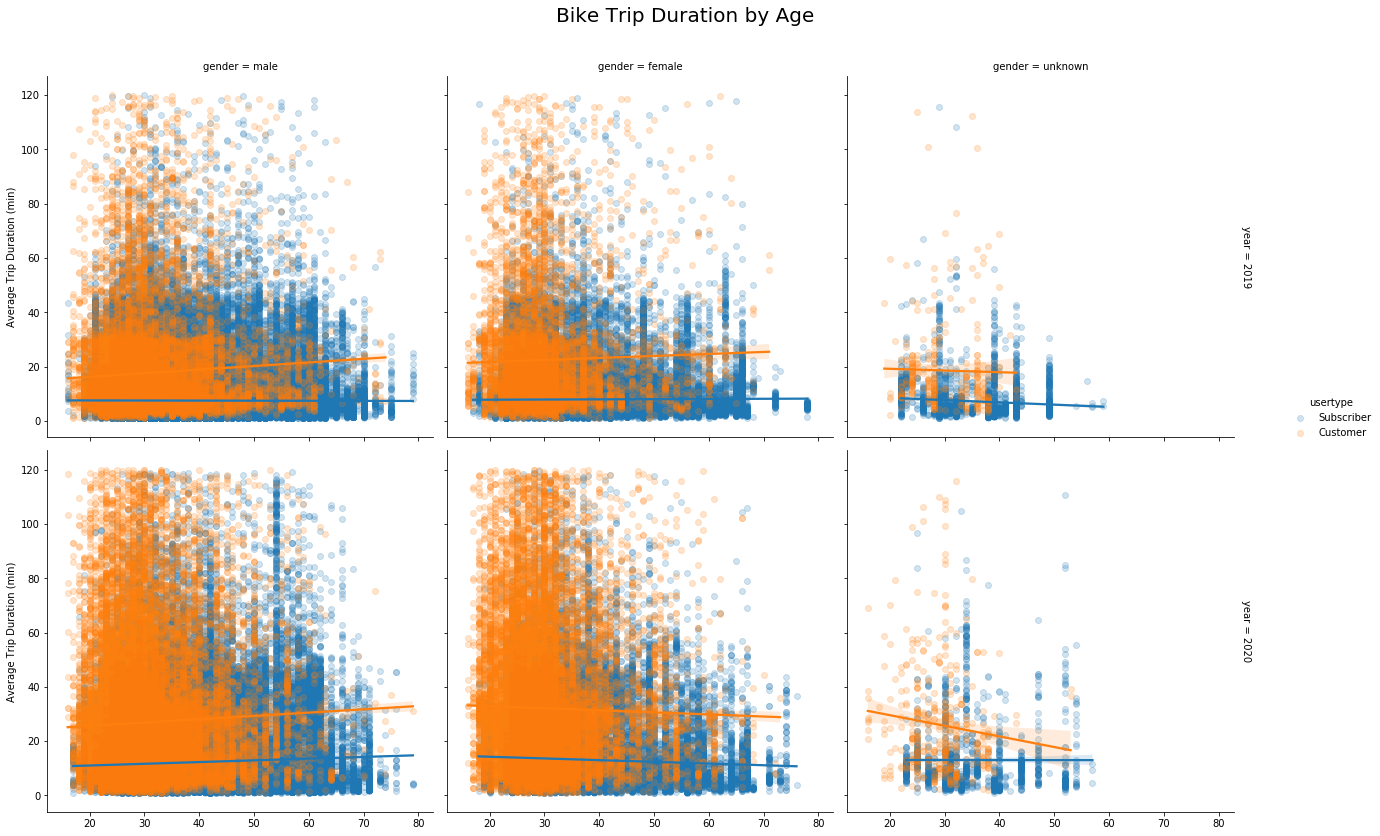

In [89]:
# mask to remove unknown gender at 50-51 years old
mask = (((df_clean['age'] ==50) | (df_clean['age'] ==51)) & (df_clean['gender']=='unknown'))
df_clean_sub = df_clean[~mask]

g = sns.FacetGrid(data = df_clean_sub, 
                  col = 'gender', row = 'year', hue = 'usertype', 
                 margin_titles = True, height = 6)
g.map(sns.regplot, 'age', 'tripduration', scatter_kws = {'alpha': 0.2})
g.add_legend()

g.set_ylabels("Average Trip Duration (min)")
g.set_xlabels("");

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Bike Trip Duration by Age", fontsize = 20);

Again, usertype type does not has much impact and there is no correlation between age and trip duration. There is only a **weak negative** correlation observed if the user is **Customer** and from **unknown gender** group in year 2020. This might be due to in general, trip duration is short < 40 minutes and user age does not have much impact on the trip duration. In addition, the trip duration might varies by whether or not it was round trip or not.

Next, I would like to take a closer look does the trend of popular route, tripduration changes based on the user's type. In addition, it would be interesting to find out the demographic (i.e. age & gender) of the popular station.

#### 2.3.3 Trips frequency by time and user type

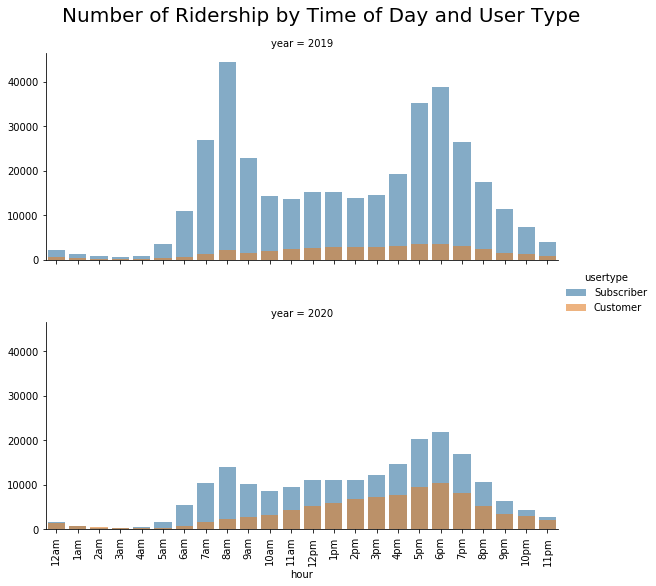

In [90]:
g = sns.FacetGrid(data = df_clean, row = 'year', hue = 'usertype',
                 height = 4, aspect = 2)
g.map(sns.countplot, 'hour', alpha = 0.6)
g.add_legend()

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(ticks_label, rotation = 90)
plt.subplots_adjust(hspace = 0.3)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Time of Day and User Type", fontsize = 20);


From previous section, trend of ridership by time in terms of time of day is **bimodal** in year 2019. However, this trend is only seen if the user is **Subscriber**. With this, it strongly suggest that, **Subscriber** tends to use the Citi Bike as the form of transit to and back from work. If the user is **Customer**, it is kind of roughtly uniformly distributed in the afternoon, with slightly more in the **5-7pm** time frame.

Also, from previous section, the ridership is left skew distribution from **March - Oct in year 2020**, peak around **5-7pm**. This trend is seen if the user is **Customer**. If the user is **Subscriber**, the trend remain the same as **bimodal**.

This showed that, the impact of **Covid-19 pandemic** saw a shift in the usertype, that is the percentage share of **Customer** usertype increases in year 2020. I would like to take a closer look on how the shift in pattern happens by month.

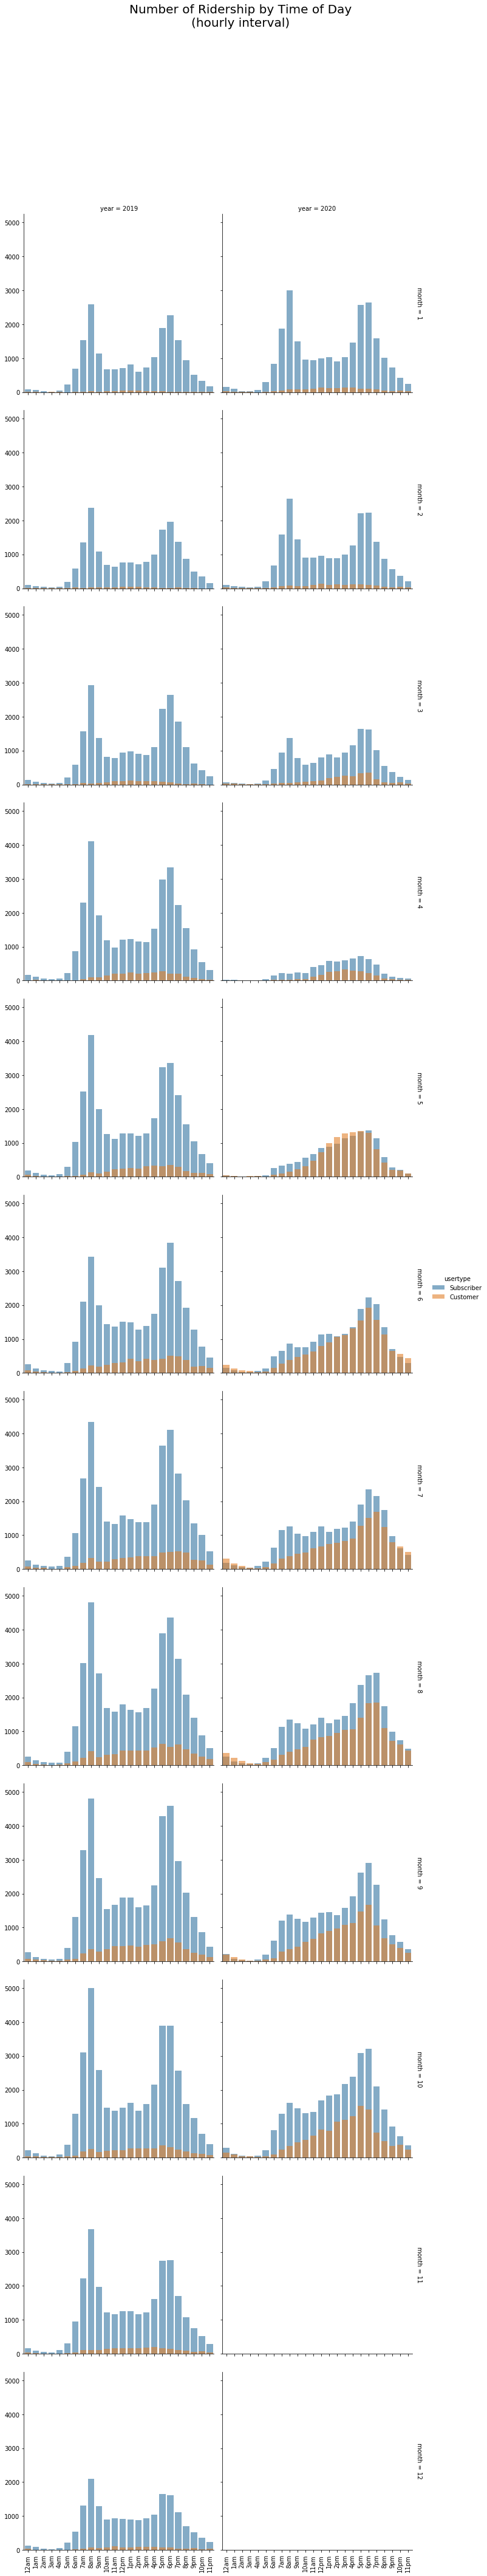

In [91]:
# Facet by month of the year, countplot for trips frequency by time
g = sns.FacetGrid(data = df_clean, col = 'year', row = 'month', hue = 'usertype',
                  margin_titles = True, height = 5)
                 
g.map(sns.countplot, 'hour', alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(ticks_label, rotation = 90)
plt.subplots_adjust(hspace = 0.1)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Time of Day\n(hourly interval)", fontsize = 20);

As Covid-19 has huge impact on the trend observed in year 2020, I searched information related NYC's government response to the Covid-19.   

Government response to Covid-19 pandemic in NY (state)
- March 22 : PAUSE order in effect at 8pm
- Apr 6.   : statewide PAUSE order extended through April 29
- Apr 16.  : statewide PAUSE order extended through May 15
- June 8.  : Phase 1 reopening
- June 22. : Phase 2 reopen
- July 6.  : Phase 3 reopen, exclude indoor dining
- July 20. : Phase 4 reopen

[link to source](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_City#Government_response)

**Dec-Feb**, winter season, Jan-Feb are also the months of without covid-19 impact, trend of ridership by time in terms of time of day is the same in year 2019 and 2020. It was observed that the **Customer** user is slightly increase in year 2020.

**March-May**, spring season, also the lockdown restriction take place from March 22 to May, ridership plummetted in year 2020, and the trend change to left-skew in **Apr-May**, regardless of user type. Particularly in **May**,number of ridership from customer almost similar to number of ridership from Subscriber.

**June-Aug**, summer season, warmer month in NCY, **Customer** user is picking up in year 2019 (May-Sept), but the trend remain that same, bimodal if user is **Subscriber** and left-skew if user is **Customer**. Asides, NYC start reopening by phase in June. Bimodal trend start to re-surface slightly moving to Aug if the user is **Subscriber**. 

**Sept-Nov**, fall season, weather getting cooler in NCY. **Customer** user is in downward trend in year 2019. In year 2020, the number of ridership, is picking up in Oct. In addition, ridership from **Subsriber** is picking up, and bimodal trend distribution is relatively more significant compared to the past month.

In [92]:
# Below code cell is the same results from above, but instead of faceting with two direction
# that is column and row, I only faceting in 1 direction, where row = month, but
# split in two block, one for year 2019, and another one for year 2020
df_clean_sub2019 = df_clean.query('year == 2019')
df_clean_sub2020 = df_clean.query('year == 2020')

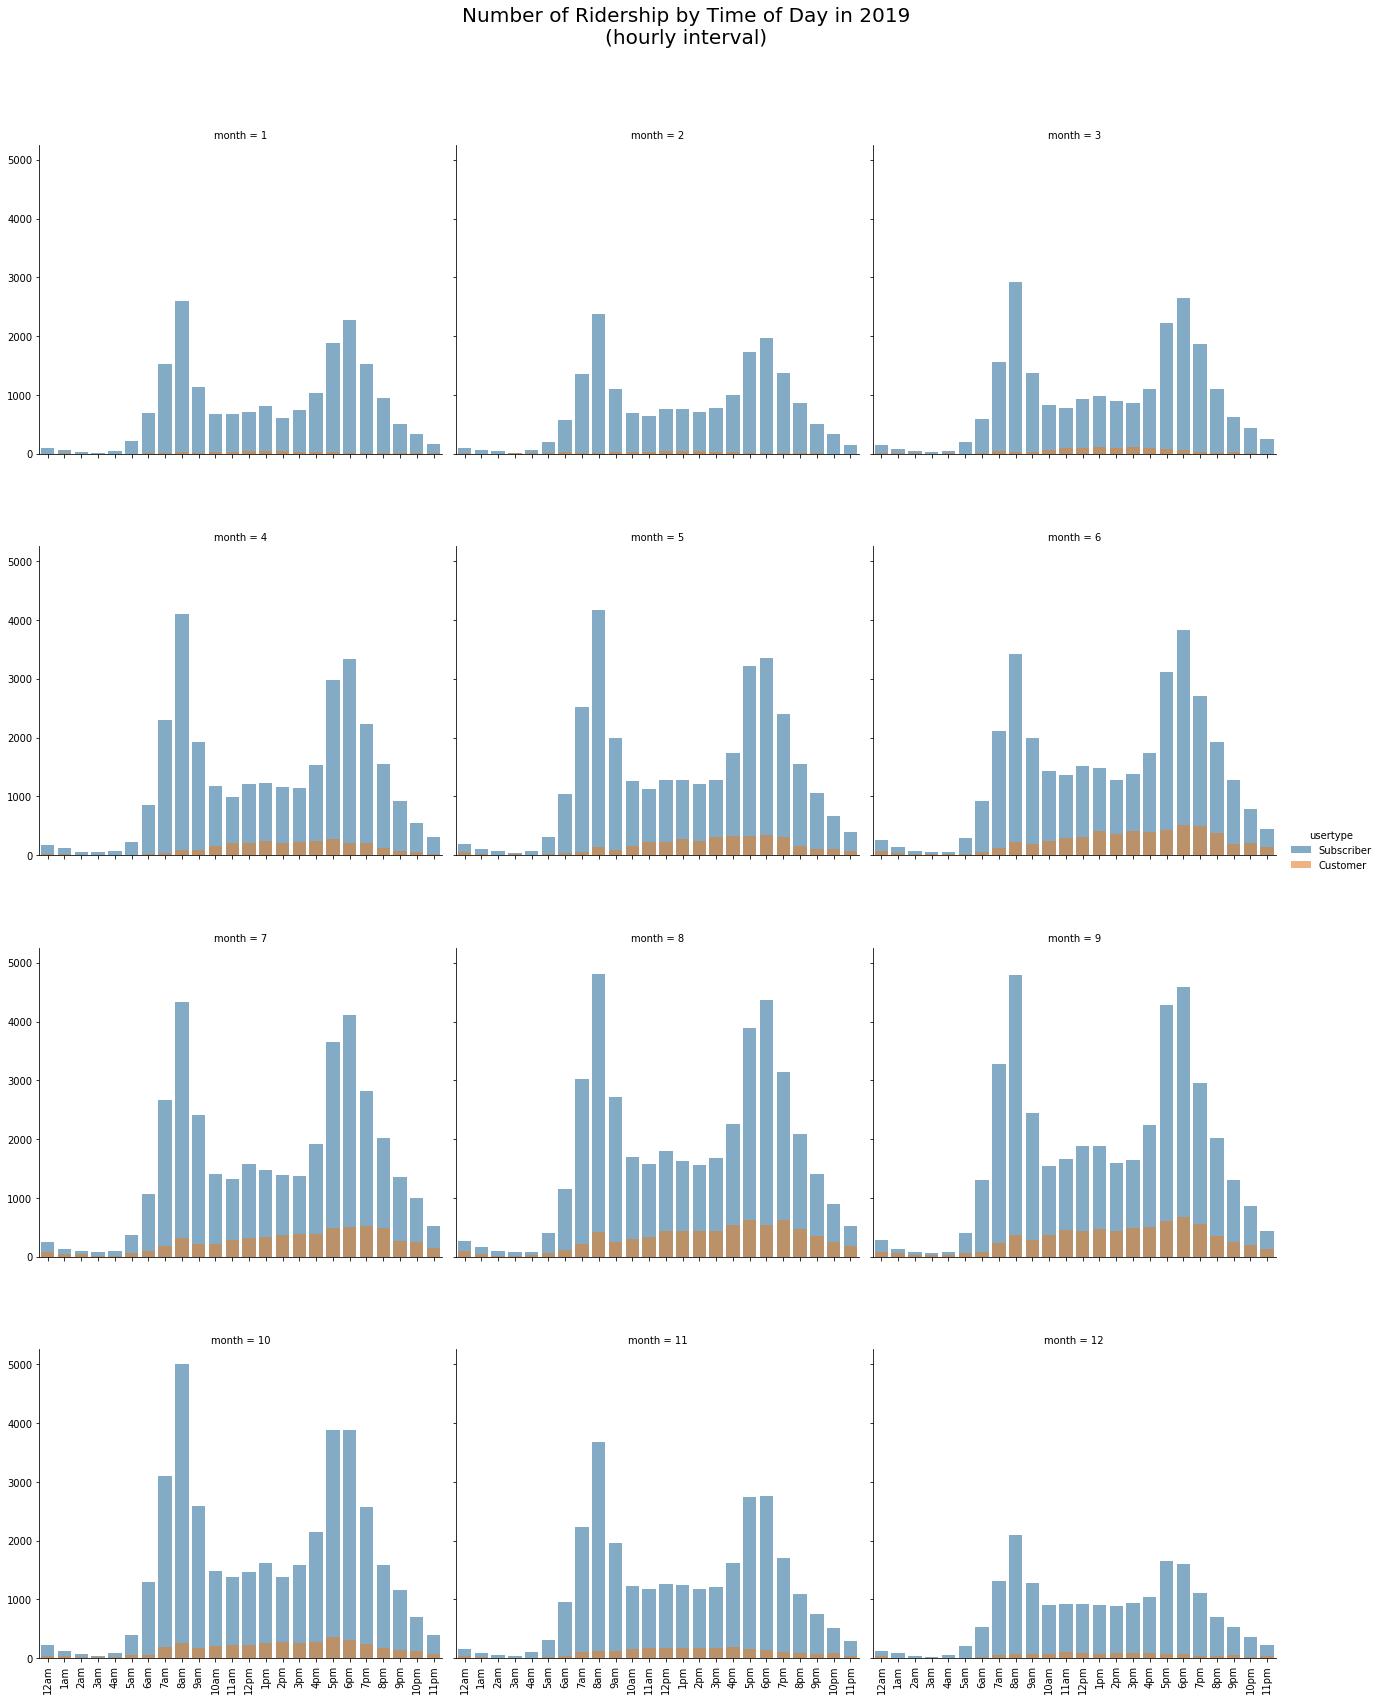

In [93]:
# Facet by month of the year, countplot for trips frequency by time
g = sns.FacetGrid(data = df_clean_sub2019, 
                  col = 'month', hue = 'usertype', col_wrap = 3, height = 6)
                 
g.map(sns.countplot, 'hour', alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(ticks_label, rotation = 90)
plt.subplots_adjust(hspace = 0.3)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Time of Day in 2019\n(hourly interval)", fontsize = 20);

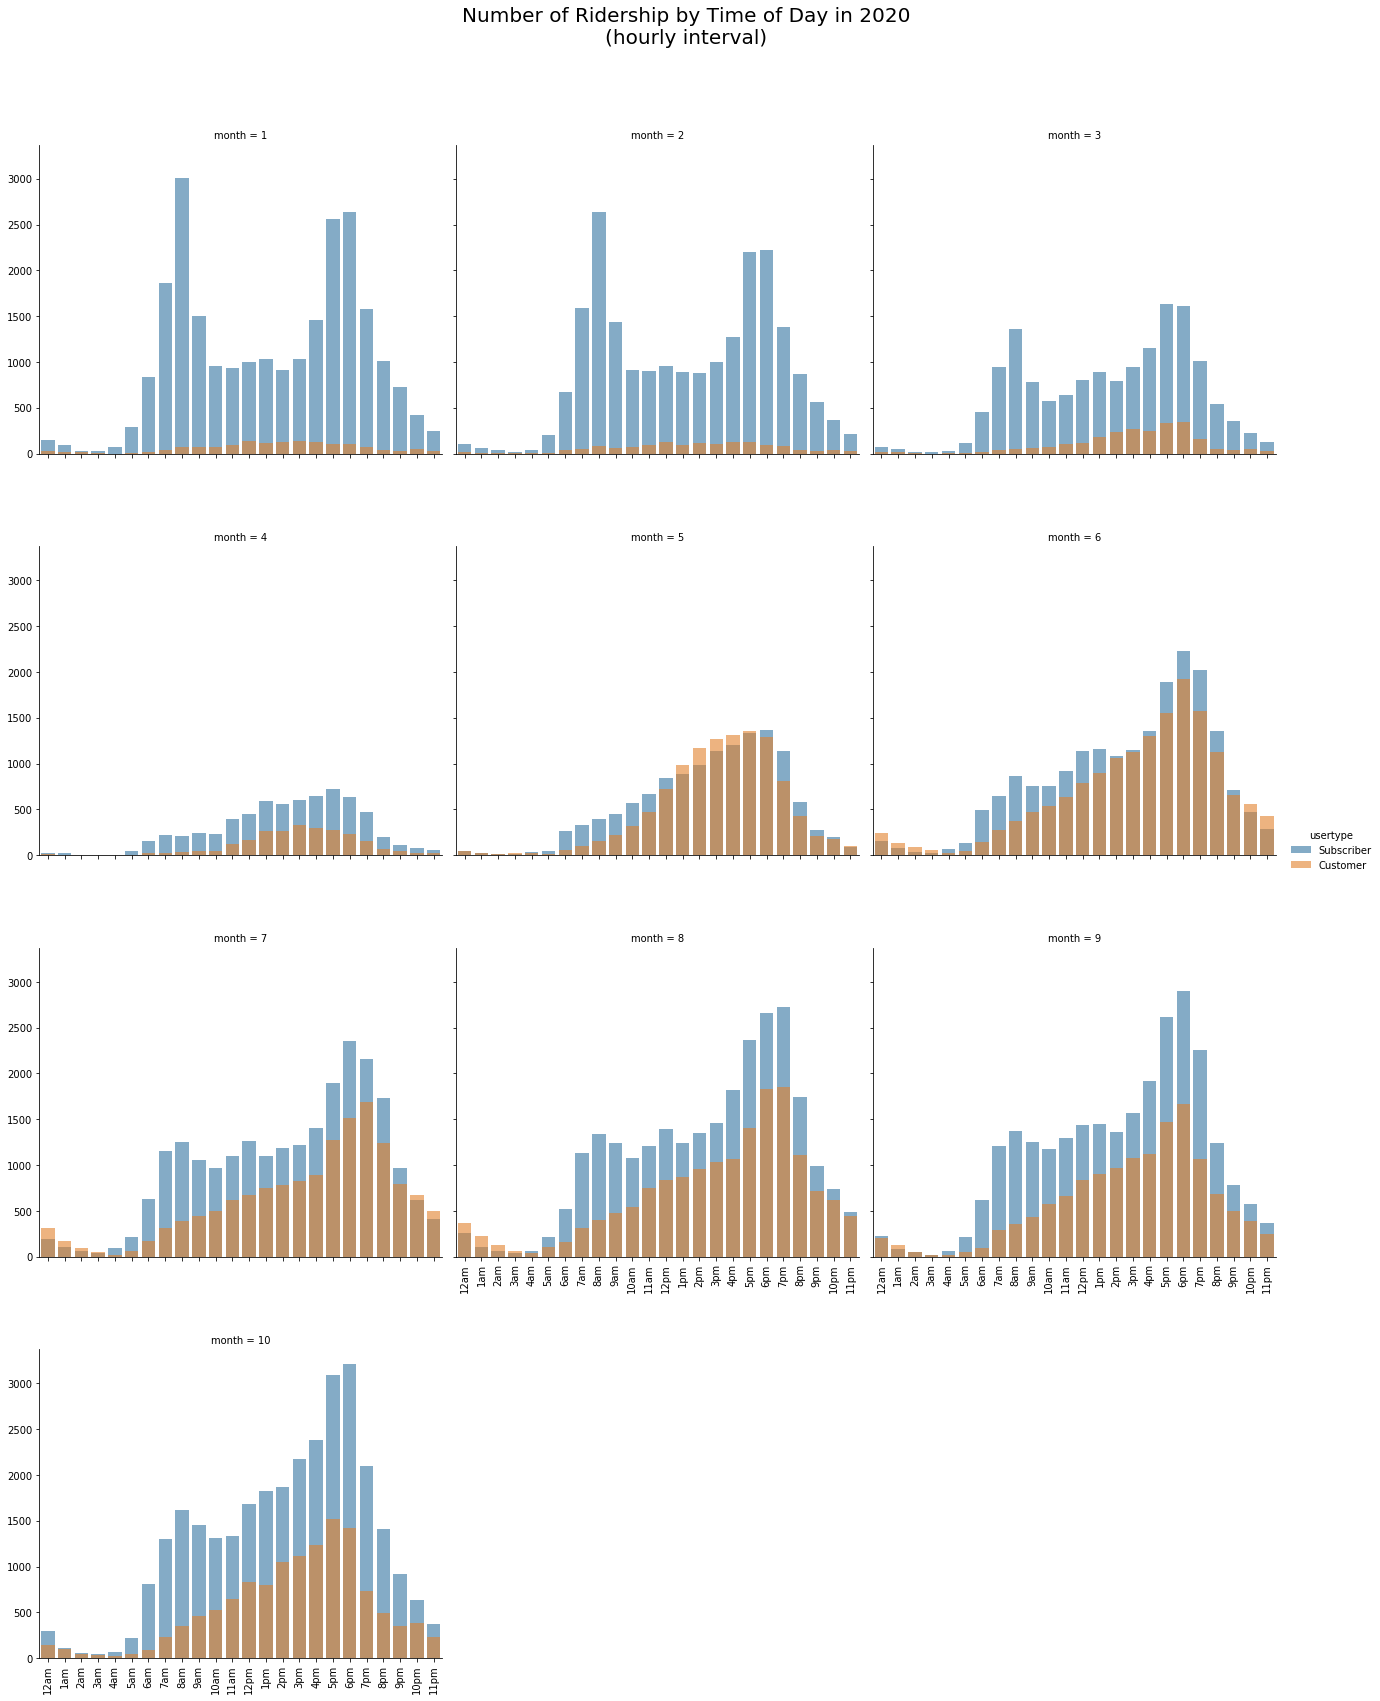

In [94]:
# Facet by month of the year, countplot for trips frequency by time
g = sns.FacetGrid(data = df_clean_sub2020, 
                  col = 'month', hue = 'usertype', col_wrap = 3, height = 6)
                 
g.map(sns.countplot, 'hour', alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(ticks_label, rotation = 90)
plt.subplots_adjust(hspace = 0.3)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Time of Day in 2020\n(hourly interval)", fontsize = 20);

In [95]:
df_clean.groupby(['year'])['gender'].value_counts(normalize = True)

year  gender 
2019  male       0.708935
      female     0.227837
      unknown    0.063228
2020  male       0.594010
      female     0.253785
      unknown    0.152204
Name: gender, dtype: float64

#### 2.3.4 Trips frequency by popular route and user type
First, I faceting by `month` (row), hue with `usertype`, but in two separate code block, one in year 2019, and year 2020.

Then, I tried to faceting in two directions, meaning all in one go.
The popular route ordered in such a way that it started from the top 10 popular route in 2019 and followed by 2020

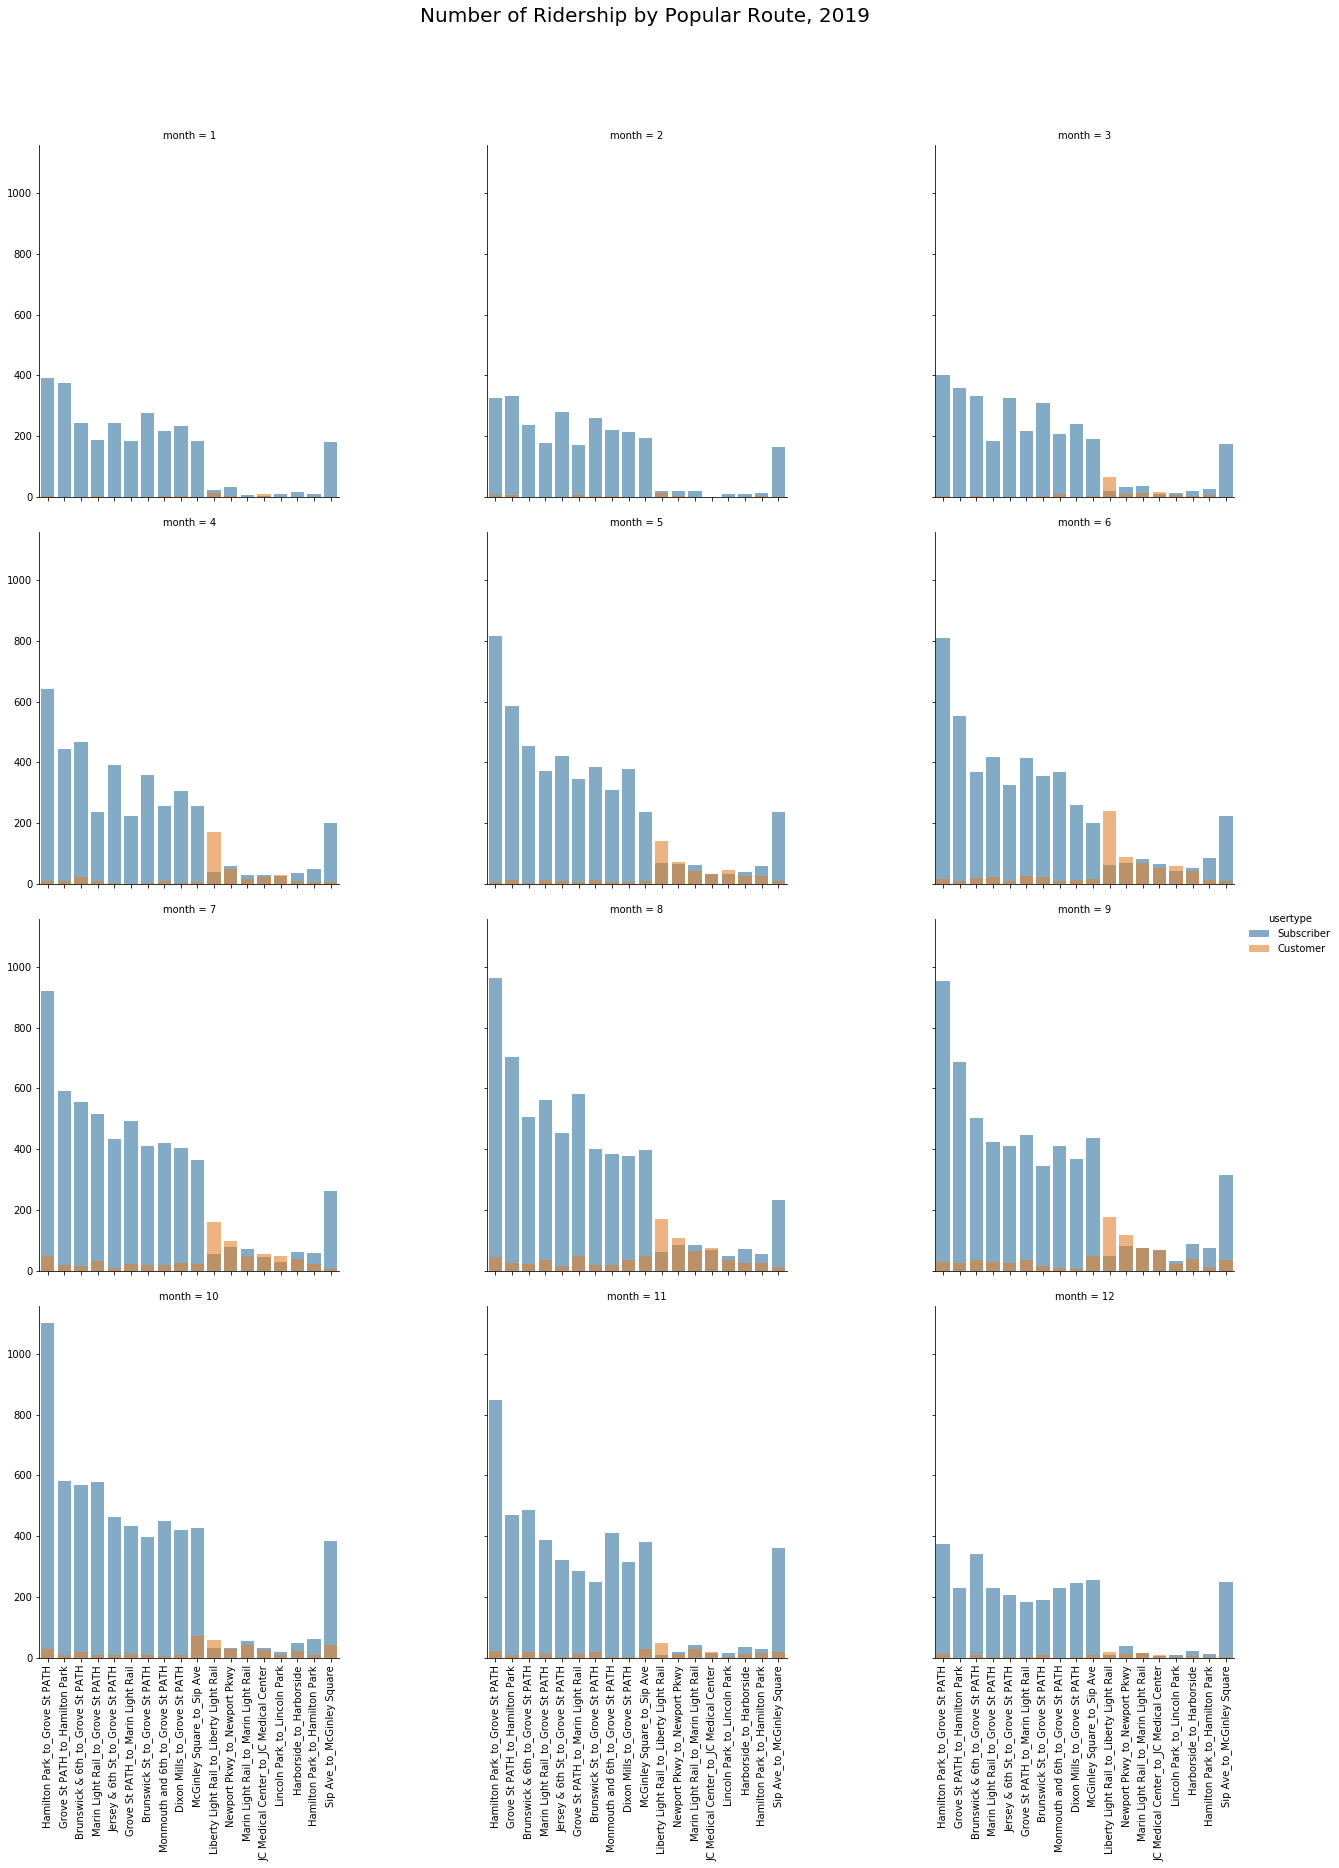

In [96]:
#Year 2019
g = sns.FacetGrid(data = df_clean_sub2019, col = 'month', hue = 'usertype',
                 col_wrap = 3, height = 6)
g.map(sns.countplot, 'route', 
      order = route_list,
      alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(route_list,
                       rotation = 90)
plt.subplots_adjust(hspace = 0.1)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Popular Route, 2019", fontsize = 20);

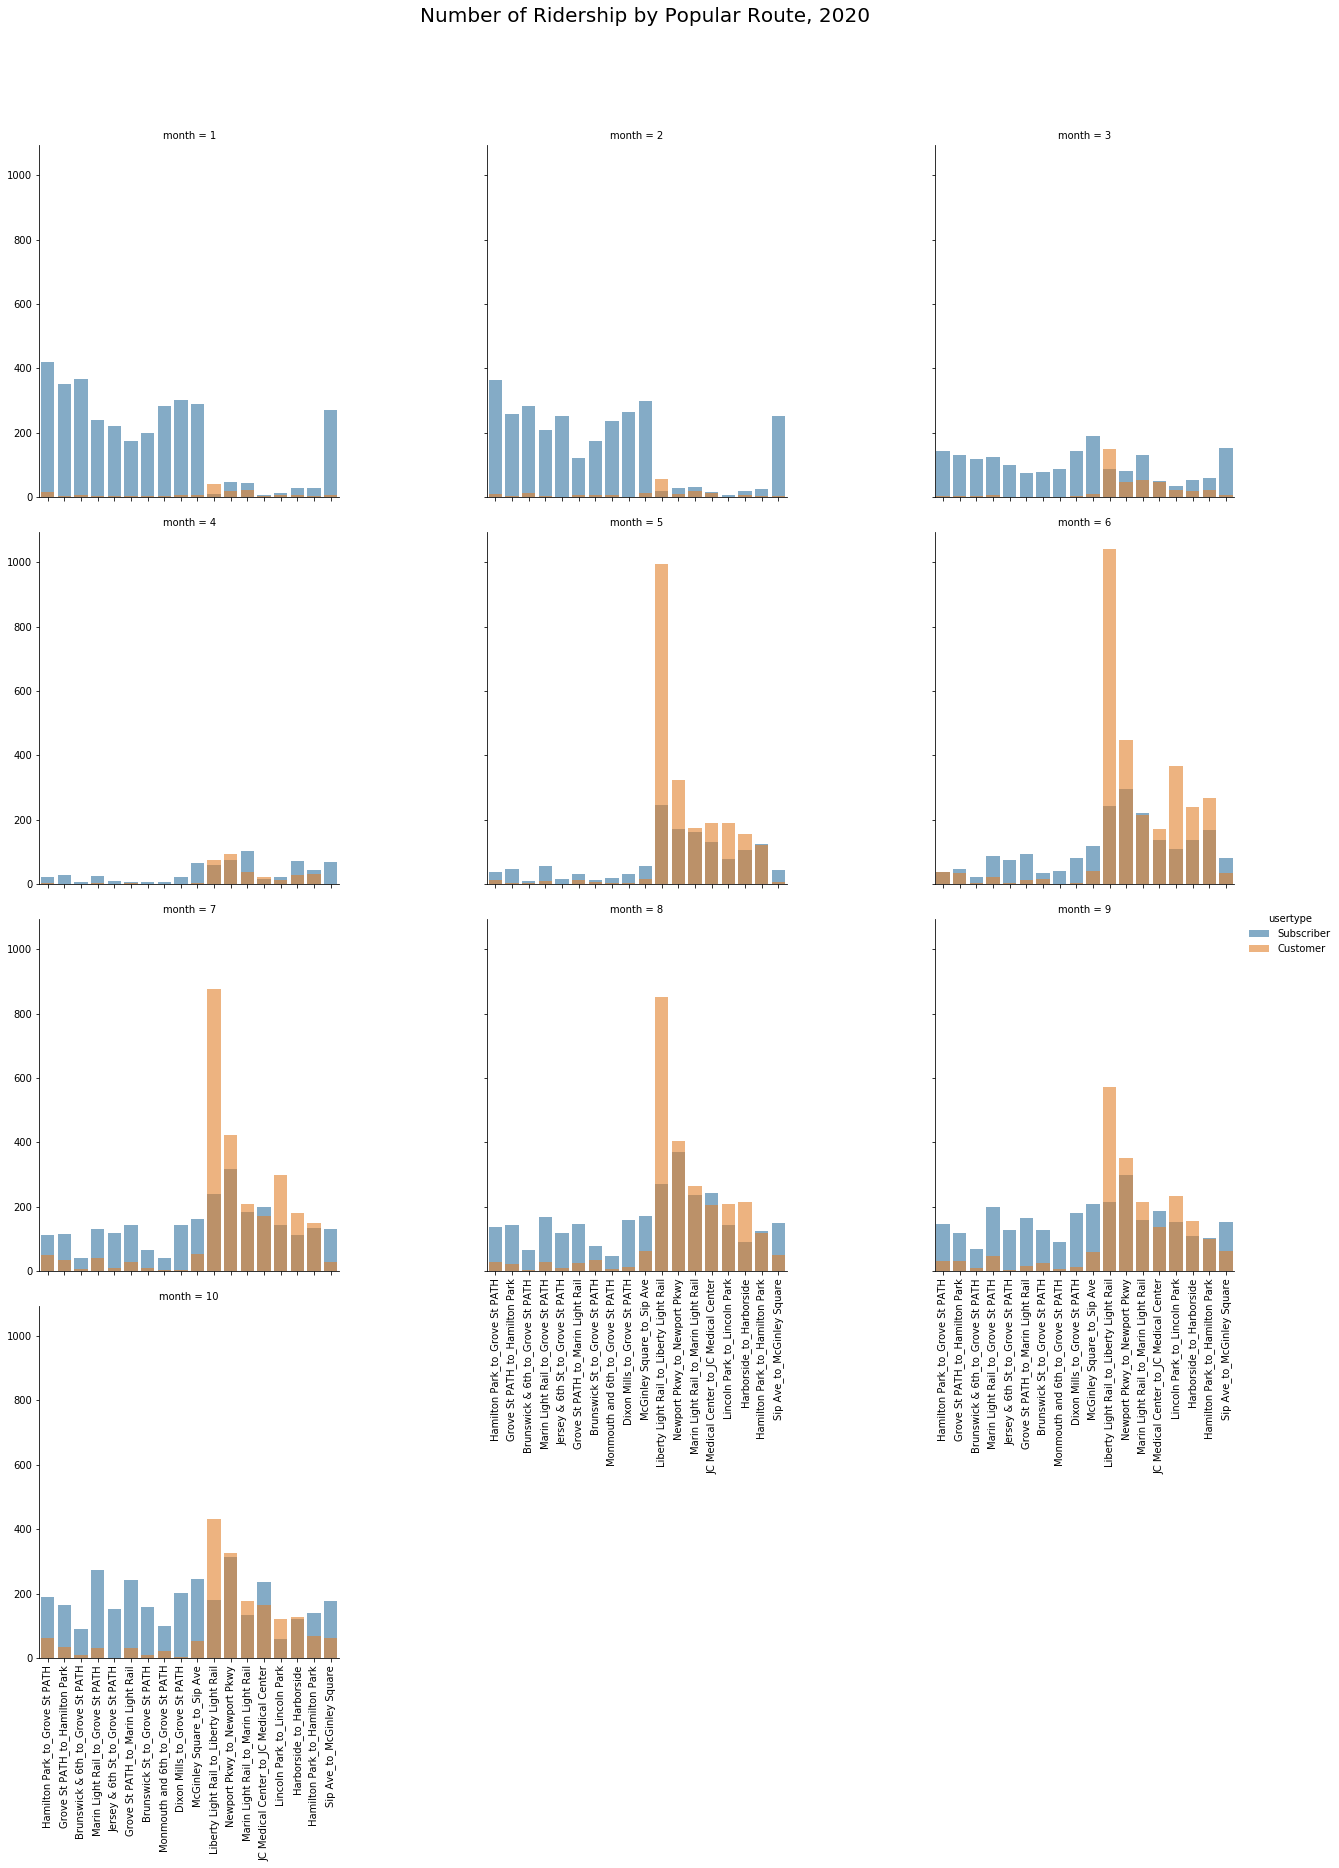

In [97]:
#Year 2020
g = sns.FacetGrid(data = df_clean_sub2020, col = 'month', hue = 'usertype',
                 col_wrap = 3, height = 6)
g.map(sns.countplot, 'route', 
      order = route_list,
      alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(route_list,
                       rotation = 90)
plt.subplots_adjust(hspace = 0.1)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Popular Route, 2020", fontsize = 20);

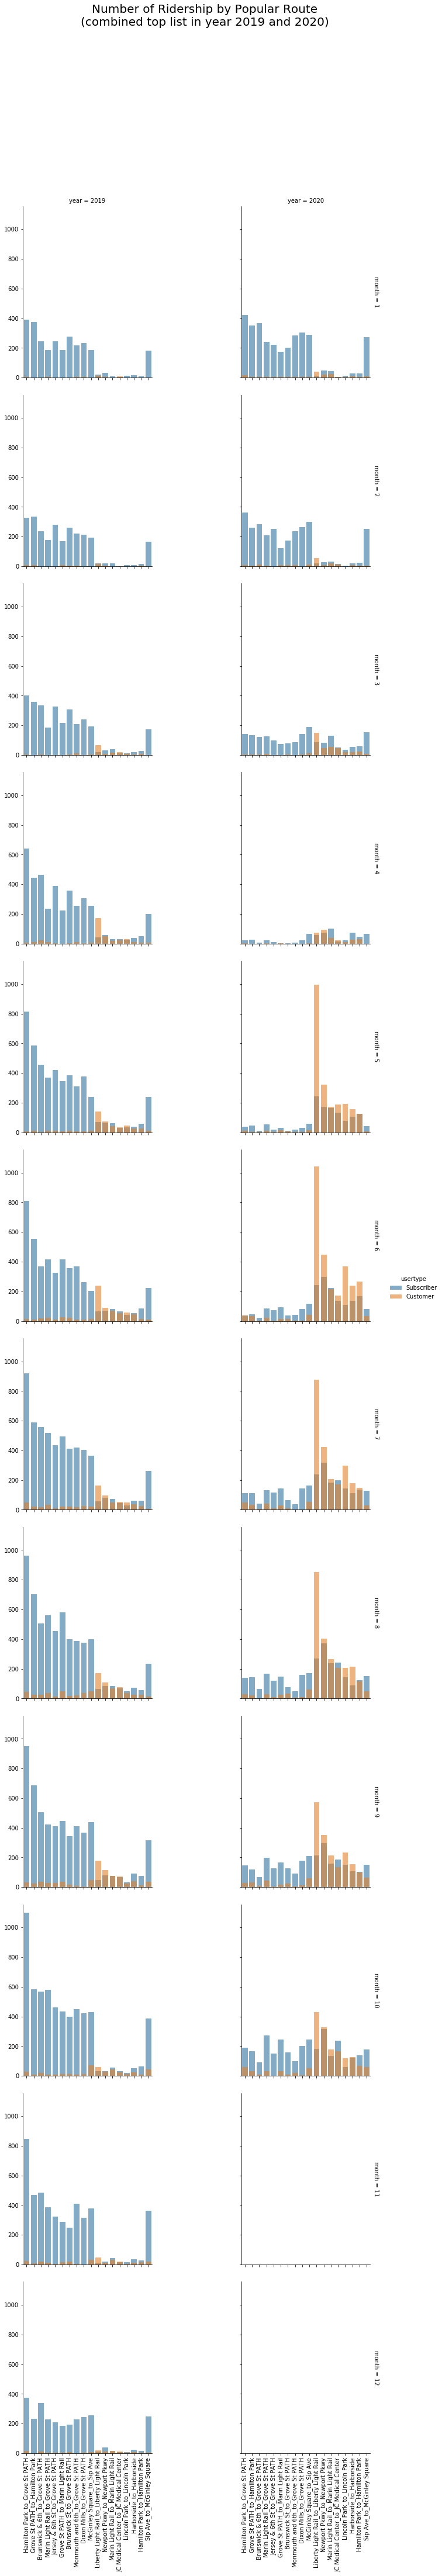

In [98]:
# Facet by month of the year, countplot for trips frequency by route
g = sns.FacetGrid(data = df_clean, col = 'year', row = 'month', hue = 'usertype',
                  margin_titles = True, height = 5)
                 
g.map(sns.countplot, 'route', order = route_list, alpha = 0.6)

g.add_legend()
g.set_xlabels("");

# set xticks
for ax in g.axes.ravel():
    ax.set_xticklabels(route_list,
                       rotation = 90)
plt.subplots_adjust(hspace = 0.1)

# add main title
plt.subplots_adjust(top = 0.9)
g.fig.suptitle("Number of Ridership by Popular Route\n(combined top list in year 2019 and 2020)", fontsize = 20);

The Route is ordered in such a way that the first 10 are the top routes in year 2019, and followed by the top route in year 2020. 

**Dec-Feb**, winter season, Jan-Feb are also the months of without covid-19 impact, trend of ridership by route is the same in year 2019 & 2020. The popular route (with high bars) are **none round trip**, and mostly by **Subscriber**. Trip by **Customer** user are **round trip**, where its start and end location is the same. The number of ridership is not much, but mostly by **Customer** user. 

**March-May**, spring season. In year 2019, the number of **Customer** user is picking up on the **round trip**. In year 2020, these are months that NYC in lockdown restriction (March 22 to May). Again, you can see the ridership plummetted particularly, on the popular **none round trip** in 2019. Number of **Customer** user is having sharp increased (compared to year 2019) on the **round trip**. 

**June-Aug**, summer season, warmer month in NCY, **Customer** user is picking up in year 2019 (May-Sept), but the trend remain that same, i.e. popular trip remain as **none round trip** with majority user from **Subscriber**. In year 2020, thse are months where, NYC start reopening by phase in June. Though, number of **round trip** by **Customer** remain high, the **none round trip** by **Subscriber** start to picking up. 

**Sept-Nov**, fall season, weather getting cooler in NCY. **Customer** user is in downward trend in year 2019. In year 2020, the number of **Subscriber** in **none round trip** ridership, is picking up in Oct.

Next, I would like to find out, the trend of **user type proportion** changes over the year. I did this, but showing the percentage of **Subscriber** user, since there is only **two user type** (Subscriber & Customer).

In [99]:
# calculate the percentage of Subscribrer from total riders
subscriber_pct = df_clean.groupby(['year', 'month'])['usertype'].value_counts(normalize = True)

# keep only data with subscriber only
subscriber_pct = subscriber_pct.reset_index(name = 'pct').query('usertype=="Subscriber"')

# get the percentage value, by multiply it with 100
subscriber_pct['pct'] = subscriber_pct['pct']*100


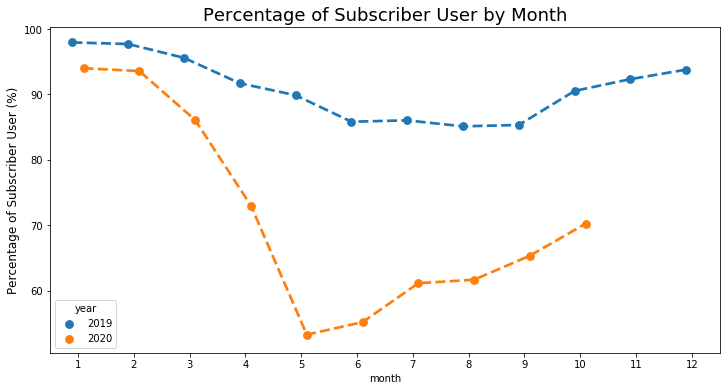

In [100]:
plt.figure(figsize = [12,6])
sns.pointplot(data = subscriber_pct, x = 'month', y = 'pct', hue = 'year',
             dodge = 0.2, linestyles = "--")

plt.ylabel("Percentage of Subscriber User (%)", fontsize = 12)
plt.title("Percentage of Subscriber User by Month", fontsize = 18);

From previous section, the proportion of **Subscriber** and **Customer** user from the entire dataset studied here is **Subscriber: 80.2%** and **Customer: 19.2%**.

In year 2019, **Subscriber** user is > 90% in most of the months. **Customer** user increased in their share duirng warmer month, **May - Sept**, but still **Customer** share still limited to <15%.

In year 2020, share of **Subsriber** user plummeted since the lockdown restriction take place on 22 March and reach its lowest point in the month of **May**, where, **Customer** user is almost 50% of the total users. Though, the share of **Subscriber** is picking up after the the lockdown ease since **June**, but their share is still far lower than its number compared to same period previous year. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of number of ridership by **User type** by looking at its impact to the ridership trend by one quantitative feature, **trip duration**, and two qualitative features, by **time** (month of year, and hour of day), and by **route** (feature engineered by combining the start station to end station). The multivariate exploration here showed that the trend does impact if a user is a Subscriber or Customer. This is initially, does not be able to explain why such trend happens between 2019 and 2020. 

### Were there any interesting or surprising interactions between features?

> Looking back to the multivariate point plot with hue by user type, it shows the trend of ridership changes with the Government response to the pandemic. The popular route changed significantly from **non round trip** to **round trip** and percentage of **Customer** user rises, particularly towards the end of the lockdown restriction and the opening by phases. Despite of ridership plummeted due to Covid-19 starting in March 2020, the ridership from **Customer** user increases. Looking at the data, my assumption of **Subcriber** most likely from NYC Resident and **Customer** most likely from tourist will not hold in year 2020. This is due to the trend of number of **Customer** user increases during and post lock down restriction. Though the number of **Subscriber** picking up after the NYC start phases of opening from June, there are still relatively large number of **Customer** user compared to same period last year. This could be new market of new normal life that worth further analysis to boost the ridership. 